In [1]:
import math
import numpy as np
#from MyConvolution import convolve
def myHybridImages(lowImage: np.ndarray, lowSigma: float, highImage: np.ndarray, highSigma: float) -> np.ndarray:
    
    high_kernel = makeGaussianKernel(highSigma)
    low_kernel = makeGaussianKernel(lowSigma)
    
    #i_1*G_1
    high_pass_image = convolve(highImage,high_kernel)
    low_pass_image = convolve(lowImage,low_kernel)
    
    weightlow = 1
    weighthigh = 1
    
    high_pass_image = highImage - high_pass_image
    high_pass_image = np.maximum(high_pass_image,0)
    print(high_pass_image.shape)
    
    hybrid_image = np.maximum((low_pass_image*weightlow + high_pass_image*weighthigh)/2,0)
    

    return hybrid_image
#  # Your code here.


In [2]:
def makeGaussianKernel(sigma: float) -> np.ndarray:
    kernel_size = int(8*sigma+1)
    if kernel_size %2 == 0:
        kernel_size += 1
    #center os half of window size
    center = (kernel_size -1)/2
    
    #norma;ise by the total sum
    kernel_sum = 0
    
    kernel = np.zeros((kernel_size,kernel_size))
    coef = 1/(2*np.pi*sigma*sigma)
    for i in range(kernel_size):
        for j in range(kernel_size):
            x = pow((i-center),2)
            y = pow((j-center),2)
            fenzi = -(x+y)
            fenmu = 2*sigma*sigma
            kernel[i][j] = np.exp(fenzi/fenmu)/coef
            kernel_sum += kernel[i][j]
    
    kernel = kernel/kernel_sum
    return kernel

In [3]:
def calculate_convolution(image,kernel):
    kernel = np.rot90(kernel,2)
    kh = int(kernel.shape[0])
    kw = int(kernel.shape[1])
    print("卷积前",image.shape)
    print(kh)
    print(kw)
    if len(image.shape) == 3:
        if ((kw % 2 != 0) & (kh % 2 != 0)):
            image_rows = image.shape[0] - kh + 1
            image_cols = image.shape[1] - kw + 1
            image_c = image.shape[2]
            new_conv = np.zeros((image_rows,image_cols,image_c))
            for c in range(image_c):
                for i in range(int(image_rows)):
                    for j in range(int(image_cols)):
                        new_conv[i][j][c] = np.sum(kernel * image[i: i + kh, j: j+kw, c])
    else:
        if ((kw % 2 != 0) & (kh % 2 != 0)):
            image_rows = image.shape[0] - kh + 1
            image_cols = image.shape[1] - kw + 1
            new_conv = np.zeros((image_rows,image_cols))
            for i in range(int(image_rows)):
                    for j in range(int(image_cols)):
                        new_conv[i][j] = np.sum(kernel * image[i: i + kh, j: j+kw])
    print("卷机后",new_conv.shape)
    return new_conv

In [4]:
def get_padding(padding_2):
    if padding_2 == 0:
        padding_before = 0
        padding_after = 0
        return int(padding_before),int(padding_after)
    elif padding_2 < 2:
        padding_before = 0
        padding_after = 1
        return int(padding_before),int(padding_after)
    elif padding_2 % 2 == 0:
        padding_before = padding_2/2
        padding_after = padding_2/2
        return int(padding_before),int(padding_after)
    else:
        padding_2 -= 1
        padding_before = padding_2/2+1
        padding_after = padding_2/2
        return int(padding_before),int(padding_after)

In [5]:
import numpy as np
from PIL import Image
def convolve(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    """
    Convolve an image with a kernel assuming zero-padding of the image to handle the borders
    :param image: the image (either greyscale shape=(rows,cols) or colour shape=(rows,cols,channels))
    :type numpy.ndarray
    :param kernel: the kernel (shape=(kheight,kwidth); both dimensions odd)
    :type numpy.ndarray
    :returns the convolved image (of the same shape as the input image)
    :rtype numpy.ndarray
    """
    # Your code here. You'll need to vectorise your implementation to ensure it runs
    # at a reasonable speed.
    
    stride = 1
    if len(image.shape) == 3:
        rows = image.shape[0]
        cols = image.shape[1]
        channels = image.shape[2]
    else:
        rows = image.shape[0]
        cols = image.shape[1]
        
    kh = kernel.shape[0]
    kw = kernel.shape[1]
        
    rows_2padding = (rows-1)*stride+kh - rows
    cols_2padding = (cols-1)*stride+kw - cols
        
    rows_before,rows_after = get_padding(rows_2padding)
    print("rows_before",rows_before)
    print("rows_after",rows_after)
    cols_before,cols_after = get_padding(cols_2padding)
    print("cols_before",cols_before)
    print("cols_after",cols_after)
    if len(image.shape) == 3:
        image_behind = np.pad(image,((rows_before,rows_after),(cols_before,cols_after),(0,0)), 'constant', constant_values=0)
        convolved_image = calculate_convolution(image_behind,kernel)

    else:
        image_behind = np.pad(image,((rows_before,rows_after),(cols_before,cols_after)), 'constant', constant_values=0)
        convolved_image = calculate_convolution(image_behind,kernel)
        
    return convolved_image

rows_before 12
rows_after 12
cols_before 12
cols_after 12
卷积前 (324, 477, 3)
25
25
卷机后 (300, 453, 3)
rows_before 8
rows_after 8
cols_before 8
cols_after 8
卷积前 (316, 469, 3)
17
17
卷机后 (300, 453, 3)
(300, 453, 3)
(300, 453, 3)


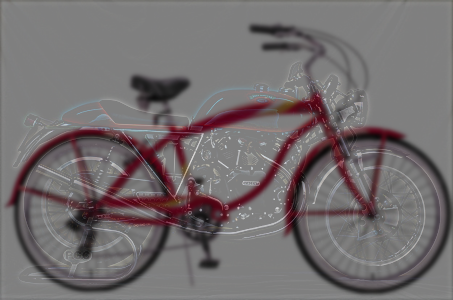

In [6]:
image = Image.open('./bicycle.bmp')
image = np.array(image)
image2 = Image.open('./motorcycle.bmp')
image2 = np.array(image2)
final = myHybridImages(image,2,image2,3)
print(final.shape)
Image.fromarray(final.astype(np.uint8))

In [7]:
for x in range(final.shape[2]):
    for i in range(final.shape[0]):
        for j in range(final.shape[1]):
            if final[i][j][x] >255:
                print(final[i][j][x])
            elif final[i][j][x]< 0:
                print(final[i][j][x])

In [8]:
# 转换为NumPy数组
x = Image.fromarray(final.astype(np.uint8))

img_array = np.array(x)

# 定义下采样因子
downsample_factor = 2

# 计算新图像的大小
new_size = (img_array.shape[0] // downsample_factor, img_array.shape[1] // downsample_factor)
print(new_size)
# 对图像进行下采样
downsampled_img = x.resize(new_size,Image.ANTIALIAS)

downsampled_img_array = np.array(downsampled_img)

# 显示原始图像和下采样后的图像
Image.fromarray(downsampled_img_array).show()

(150, 226)


rows_before 120
rows_after 120
cols_before 120
cols_after 120
卷积前 (601, 650)
241
241
卷机后 (361, 410)
卷积前 (601, 650)
241
241
卷机后 (361, 410)
卷积前 (601, 650)
241
241
卷机后 (361, 410)
rows_before 44
rows_after 44
cols_before 44
cols_after 44
卷积前 (449, 498)
89
89
卷机后 (361, 410)
卷积前 (449, 498)
89
89
卷机后 (361, 410)
卷积前 (449, 498)
89
89
卷机后 (361, 410)
(361, 410, 3)


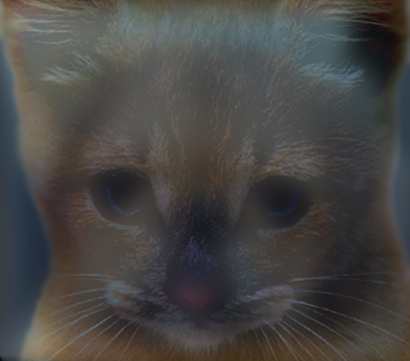

In [9]:
image = Image.open('./cat.bmp')
image = np.array(image)
image2 = Image.open('./dog.bmp')
image2 = np.array(image2)
final = myHybridImages(image2,11,image,30)
Image.fromarray(final.astype(np.uint8))

rows_before 121
rows_after 120
cols_before 121
cols_after 120
卷积前 (602, 651)
242
242
卷机后 (361, 410)
卷积前 (602, 651)
242
242
卷机后 (361, 410)
卷积前 (602, 651)
242
242
卷机后 (361, 410)
rows_before 49
rows_after 48
cols_before 49
cols_after 48
卷积前 (458, 507)
98
98
卷机后 (361, 410)
卷积前 (458, 507)
98
98
卷机后 (361, 410)
卷积前 (458, 507)
98
98
卷机后 (361, 410)
(361, 410, 3)


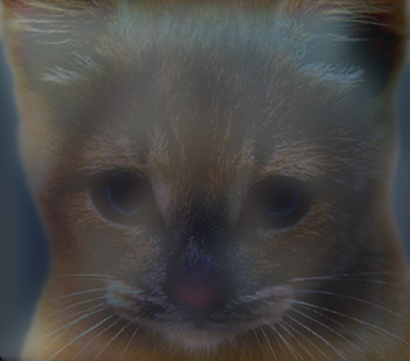

In [86]:
image = Image.open('./Untitled Folder/cat.bmp')
image = np.array(image)
image2 = Image.open('./Untitled Folder/dog.bmp')
image2 = np.array(image2)
high,low,final = myHybridImages(image2,12,image,30)
Image.fromarray(final.astype(np.uint8))

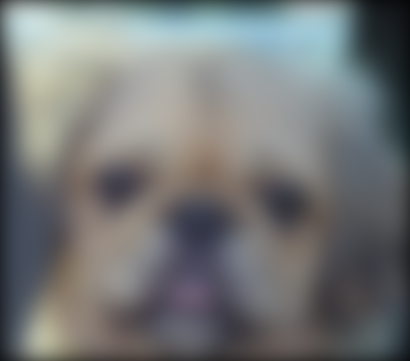

In [78]:
Image.fromarray(low.astype(np.uint8))

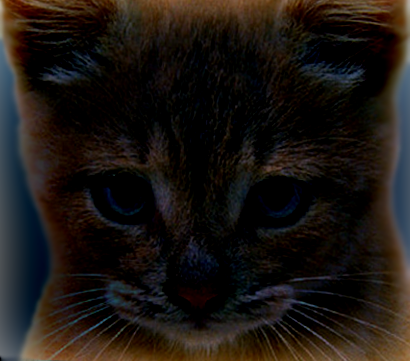

In [87]:
Image.fromarray(high.astype(np.uint8))

In [64]:
for x in range(high.shape[2]):
    for i in range(high.shape[0]):
        for j in range(high.shape[1]):
            if high[i][j][x] >255:
                print(high[i][j][x])
            elif high[i][j][x]< 0:
                print(high[i][j][x])

-16.745078986408032
-8.76252741917417
-10.81462732036362
-10.90738016055883
-10.046389730507464
-7.236799645842211
-5.483249172519287
-3.7898392587964977
-3.1600992973936144
-0.5969683781583832
-0.1027839365659382
-21.757815467523358
-10.695912470871065
-11.670264350708926
-10.687096574545727
-8.752219485878264
-8.870963710272228
-10.048134342549865
-8.287976077236692
-3.59413881799842
-3.9696585849804293
-0.4169458451987751
-6.896700263311011
-28.726675764794265
-13.587671895252633
-13.486507301345526
-12.429623428765538
-10.423029397193822
-5.472235432072708
-5.582205466730741
-5.757321458560767
-4.001347902867835
-3.3174124627793304
-1.7079939973230864
-0.34184768771108054
-1.042320041457149
-5.889464182045359
-23.643581133537772
-14.430055944354564
-15.25592946575668
-14.127850179480014
-11.052017335361931
-7.0341125476294195
-7.079250871080703
-7.191944395057007
-6.376065726694563
-6.6348284146124215
-5.97077469023283
-3.3857707755518973
-1.8810066880527394
-3.457022580732545
-2.1

-19.661285155874822
-18.113067310127576
-15.483101371349449
-16.768418458230656
-23.965991767417535
-27.07280736702134
-24.08590024336172
-16.002408068735775
-16.819630497642095
-20.53508130483206
-22.14655309173031
-21.65218351552039
-20.050521698074846
-15.340585543365108
-14.52191828078
-10.59464646729927
-9.559540037976745
-10.418050706045278
-10.17234817608147
-13.825354404066346
-9.380764986777294
-2.843065673660732
-0.8777401125474711
-1.9682742576703163
-1.0080492112352744
-2.8490675193520474
-12.780317243514375
-22.720675146444762
-30.68047939329483
-30.669893202736745
-26.698793847028128
-37.77666195762434
-39.91248893778119
-32.11468353343422
-29.3909978659331
-30.748453707815322
-27.19328008606456
-25.730878797086923
-24.36578412491609
-25.101650076678567
-23.941235458012663
-20.88641078786005
-16.93816278999089
-15.096639488959013
-12.361162312967714
-11.730298509223843
-11.20189291348975
-10.773141200405114
-9.440662590240976
-10.20055407121039
-8.048464089724725
-4.97965

-22.467080226094197
-22.54983958968191
-22.659925022516944
-22.796885504396528
-22.960103022578863
-22.14877418604496
-22.361879570442113
-22.598251591481187
-22.856503841026466
-22.13506760381196
-22.43226232326242
-23.74624077813678
-25.07501947093175
-24.416486564283815
-22.768470548217465
-23.12879016204451
-23.495147478187647
-22.86523505798968
-18.23675937891454
-15.607484450394566
-13.975310813169159
-14.338237082657031
-13.694344349992548
-14.041900835734452
-14.379310466353445
-13.705125697726771
-10.018050803402247
-4.3169468097946435
-2.7674987328006466
-12.945828522775798
-27.10434899956482
-37.24230309142291
-47.35883003274947
-50.45288699817826
-47.52322483108003
-43.56836642702751
-40.58656748684459
-37.57580166688177
-32.533740467742916
-30.457720558046788
-26.344752911595634
-22.191555781626107
-17.994499003822995
-13.749675356123277
-11.452923169465208
-4.324113155711075
-5.533053498867872
-5.652310747772617
-4.677501750604989
-0.44469454429821553
-13.430457391529245


-5.988534911903372
-16.07732713541742
-26.15109131618192
-38.208873228226054
-39.249491410948906
-30.271519851418958
-41.273277978752475
-58.25279985974464
-55.20782696600958
-29.13579692881413
-20.033819581918436
-16.898685932422183
-6.726924095418525
-6.514767586667119
-4.701016721404443
-11.219177874801943
-11.274467638176276
-3.5377206792279594
-5.978851096471814
-1.369505379520433
-6.317912074441082
-21.5869455993832
-35.846478884597474
-45.10490103865605
-57.37045921328347
-57.651205062202536
-57.95491462229219
-45.289029474105945
-28.66057621980704
-39.076131436604825
-45.5417453792831
-38.06292253213542
-34.644577921960476
-40.29102510955015
-45.00595078951709
-38.79241274052741
-38.65284411403819
-38.5890673560793
-11.602287730370179
-29.8616525677418
-14.107393724047881
-18.42938064470264
-19.826201424758104
-17.296006543590437
-23.836576228160617
-19.445384076161297
-2.119610855628018
-0.8561736879327029
-6.6517914702176455
-12.503039372280234
-13.406348075961084
-13.3580434

-9.085387916606038
-2.689956699067608
-13.116505118935294
-19.727375394806415
-22.34058715383435
-33.956390529807805
-40.57502885944072
-44.1967564112023
-30.821830252028207
-26.4505248177081
-27.083129793920165
-28.71997438387217
-33.361456604356306
-33.008027496255124
-25.660157457619164
-22.31838918505136
-20.98333105310627
-18.655638092082825
-24.3360037097697
-25.025171159536313
-24.723847481186198
-26.43277460089743
-26.15270100407355
-22.884392676860955
-16.628596875866094
-12.386024845139445
-13.157311117218512
-20.94303364125588
-20.74368575686097
-15.559659310844609
-12.391250139907157
-8.238657140387204
-6.101934639782883
-0.5783228468955315
-8.907981351782666
-1.8779272020943552
-0.842576121243269
-0.7564140468213623
-0.6502271978833676
-5.589748116979024
-9.524354217156286
-10.45397218769051
-15.378495663941692
-8.297775659686238
-5.211593648970251
-7.119709567005998
-5.0218196110485565
-5.917586846798059
-11.80663134541274
-9.688571127086988
-12.562975894292322
-12.429399

-33.35995226985574
-47.85943812700785
-42.35537888212738
-33.849334660401155
-32.342205880885274
-25.834740521550856
-16.32754573465229
-7.82110405858262
-0.31580384006102236
-3.537645056796265
-11.165423952932542
-23.80970735233791
-35.47174034417395
-35.152732712806284
-23.85380455251871
-6.575995406781004
-11.3202351906084
-16.087318742066117
-19.877911250066262
-19.692536795726824
-18.531529270156085
-12.395061894981069
-9.283133688497117
-9.195558512698256
-14.131987487320856
-17.091895240567936
-17.074579002218883
-15.079172303550536
-10.104632981854735
-9.149812632500982
-9.213448484900908
-1.2941288256849646
-1.3903733504553202
-3.5006621403767895
-2.6234338987639774
-1.7570789765162544
-3.8999985907100836
-5.0506170944998985
-3.2073781943714437
-2.3687830707059447
-2.533403483748998
-0.033423137522134994
-0.1983037984362852
-1.3606208319411337
-1.5195083051243898
-2.8242683466287986
-1.1080685329206688
-6.24109400291988
-4.367830793075996
-4.488069356713424
-10.601652733344224

-18.60117563891484
-19.567542693238977
-12.560170079587863
-7.577349912135162
-6.61721652136157
-4.677780011777685
-2.756941575128792
-6.852529390718217
-4.96230398674831
-3.2153023359916517
-5.353947205676718
-5.497652654203961
-0.5439954505603168
-2.4353062464293487
-0.3188496091981108
-2.6632175242826293
-1.256567879927303
-2.1261030956594027
-3.0000154311248934
-5.8792863496712755
-4.764813978664193
-3.657461988174333
-1.5579517004879335
-2.4669106728971144
-1.1964166582304188
-5.153508296973428
-7.120632912625467
-4.097650398910929
-5.08434840753597
-9.080406255105657
-4.0854125961450904
-3.148826970656529
-1.1839648644764793
-3.2248708829094994
-9.270729026008155
-11.320713822904594
-3.37393617178995
-0.7609470570654935
-0.6877892365032778
-7.5091610342749675
-1.5997712136124278
-5.847018325576201
-18.949628942873233
-30.065067205261784
-26.19493751664581
-13.340803267641505
-5.504164238628292
-9.68645746143035
-16.88904991029053
-24.113208039683393
-23.36008738539355
-7.63073845

-0.691583958641516
-13.33456129109566
-18.511972803647595
-21.715394786914132
-19.945914486747974
-21.204438240381194
-20.491699973292448
-18.808276644027565
-19.15460626899936
-14.531002219916282
-16.93765770714657
-11.374683874246017
-11.842123977091639
-9.339971589891611
-4.868203903942366
-4.426778823916386
-0.01568292096678192
-3.613721224950254
-7.925203589244163
-12.301619861049971
-16.729968972315092
-21.19673658171206
-23.68802172309242
-21.18963633097917
-17.68722237891562
-10.166379243666142
-1.61279157239629
-25.18783439080758
-37.9572012307506
-14.670052885171515
-6.5274539480661815
-9.070469389125861
-2.6091604500734604
-33.96593441631822
-43.31966625211115
-25.67031916865872
-9.01785725185647
-2.3784266012361854
-2.711532635382582
-1.0773703868013058
-2.0042501704789117
-4.612940739180658
-3.2581936233070508
-7.941776381116824
-8.665219707300963
-11.429822743692341
-13.236623037404684
-16.08634925694912
-21.979459167796534
-18.91611168774736
-17.896159472963774
-26.91919

-6.855663630453364
-5.45317147164522
-3.0548497527598215
-0.658283357380526
-2.457356358739702
-3.0467660658491127
-0.8458690222797145
-1.3676177120825628
-1.8744728183816335
-0.3656922982372919
-2.8406651113041903
-2.2988491977146452
-2.5312098145669495
-1.6347091543700003
-3.948133836877304
-4.243247130297732
-3.037486277527421
-0.292990667889768
-4.836699276491601
-7.131558044371275
-8.446066544803614
-5.783320071586729
-18.146279495828622
-16.5377303920327
-16.960268295431263
-21.41627006462707
-16.90787202098062
-14.436946113012084
-11.005096160141221
-8.613622229524509
-11.263536460525842
-15.955531150316403
-12.68999583009031
-8.467009400987507
-9.28632822928239
-10.147401445188535
-16.049391941430258
-14.991177875727374
-10.971365192539736
-1.988309172060184
-2.040152321650737
-8.124817669323448
-2.2400554806488913
-6.744514648301987
-3.9568325669739295
-0.6879654280018599
-4.953902281378106
-3.226465822106263
-9.503079664070157
-10.781253601352972
-3.0586245037637525
-4.332965

-12.060999265132466
-18.16555895865031
-19.30365968298512
-13.476517237124597
-6.685208977573041
-8.93069230029677
-4.213828210682031
-1.5353994479990263
-1.896114238347387
-3.296642116641781
-0.8925150223023479
-4.960265938468538
-9.088833613268235
-13.266426215628158
-17.480766877281027
-21.71914018639194
-23.968499214532358
-21.215583367314537
-16.447021432686626
-7.649425580234677
-4.990984546020684
-3.862629195146127
-3.601093429849044
-6.239102364276107
-14.8293222062685
-47.37711027950448
-31.887428081916113
-23.23725225378638
-18.639403049570262
-37.022993995758895
-49.390687811487254
-46.74481734698165
-31.087412059512133
-13.680537509369259
-10.983450189141678
-12.283394691163608
-26.58117974239761
-29.87761970486295
-52.17356563971114
-51.4699360987978
-53.767728730518485
-71.06805410540841
-41.37213276769691
-35.68133572116298
-30.997168129322347
-22.32128720275213
-2.655517100290922
-5.362323626669706
-1.739239033608726
-0.1349245302943416
-2.551824781140482
-10.9924250008

-11.352011315522901
-26.50926328814751
-30.564005007879473
-7.523167689517436
-24.895390548924553
-41.53972538279615
-22.121344577655293
-14.646163953251005
-21.119815621986845
-31.547624330720737
-47.93461307484509
-47.285498639416744
-7.604695331510868
-10.583749835759733
-4.955031683143432
-6.357197702154821
-0.7926930950969222
-2.2345367885144753
-6.965576720730752
-12.74616459254247
-20.577570233071583
-17.460823217742444
-16.39669912227413
-14.385701150399711
-13.42805669516477
-16.523726316387837
-18.672359845371517
-17.873314509877076
-16.125674897261263
-15.428222520001839
-14.779477318915184
-15.177676534534356
-14.620825976962351
-12.106701294545417
-6.632848886495225
-2.1966458024920996
-0.7952790514019341
-0.08517016070717887
-0.7702752723957644
-0.07899357900751625
-0.5758672578225514
-2.8139985431410537
-2.8347032640130863
-0.08281278741841902
-5.405199727693599
-2.732204661719493
-3.063322159093417
-7.401419908140184
-2.749390542266525
-8.201005077253853
-14.69439176712

-6.495308897607771
-1.2906487602386676
-0.6252922931191733
-6.883677701361989
-4.619541754301309
-7.346919326910353
-5.065736077028333
-0.77590936116178
-0.4773401365687562
-3.8488053840573855
-4.494774960175931
-2.13079985433356
-1.5705617457082894
-4.153107051589188
-4.724176081437264
-4.283516993572249
-0.8308982197807211
-3.399394633415824
-7.897240764953267
-5.382486014057633
-3.8551744225628113
-4.315393304590373
-2.763306766556184
-1.1991423226361917
-1.6232297005618648
-2.0359800996087927
-1.437887704097534
-1.6904967751288211
-4.029011191204859
-3.3670589820180794
-1.7058244780776306
-4.046482579349032
-1.3901995370608802
-0.7380635230419443
-0.09111101216873863
-1.4503024832373228
-1.190473319637789
-1.5729130867999004
-1.9643759374579872
-4.365252143368764
-2.7757754719031027
-2.1960080240081936
-7.038729799519473
-7.445501370346761
-10.83110299522724
-17.19271771543555
-18.52750852531281
-11.832654655039377
-5.105378441912066
-6.342951806459652
-6.542744102060681
-2.7022298

-3.36356816148124
-1.5838225282135738
-2.011784780838582
-6.653218490383026
-13.589835270856128
-12.153625232214779
-9.740598083942274
-6.280407588692896
-4.774600580940245
-14.22496882307425
-16.63352985778903
-16.00250270016801
-29.33427729016975
-39.631398024260804
-46.8965133484388
-32.13237200850023
-29.341784249461725
-17.527591919498832
-0.6926543202068558
-7.597602239957816
-21.69754900827766
-16.802504675551624
-12.914663351964919
-5.036162945518164
-2.315592844760708
-5.47768055278393
-3.588947695502412
-7.3958813878513325
-11.244516552501864
-15.124818253621655
-19.02638133160768
-22.9384751019479
-25.85011018358111
-24.75009845891674
-20.627124055104517
-13.469814567943033
-5.266827095052008
-3.8344369017621887
-5.243459876662797
-0.2931060675703918
-21.06996639765984
-33.94787737417599
-6.814634246716167
-0.3168516064165203
-1.1854922454637062
-8.17203870712143
-12.201180648525963
-13.278320112037136
-12.408492499275923
-8.59633423184735
-8.846068980404027
-13.161474838034

-10.985856009366614
-11.988825159670924
-12.999687017100513
-12.020872464390749
-11.054676260228007
-4.10331957944382
-1.168910596811429
-7.2533823250685
-9.358457784217535
-16.485654039808423
-18.636297055287926
-14.811502845010708
-10.012157288004687
-10.238914006958936
-20.492183166836355
-28.772142698531056
-32.07871790959241
-37.41160101740638
-45.77024514440339
-48.15387109477267
-31.56146170740803
-24.991760784294755
-12.443326822931141
-18.91450684444432
-15.403458056119646
-22.90817176208982
-29.426180592342746
-38.95536255718471
-27.49321877195338
-7.037128811496686
-1.2696065495424165
-2.775661136103764
-4.762373267160783
-14.310847716174095
-8.819400116068621
-35.48438185752751
-44.816557271861996
-40.118656130183126
-39.39256871124695
-25.640257002408603
-20.86375380642761
-14.065167412639987
-11.246691351701152
-13.410612106011605
-20.559319931406144
-20.695302682601508
-21.82117233225626
-9.166115170899467
-9.280181400628251
-1.3990898089155692
-1.1700075879033278
-4.833

-28.53541973534024
-35.56629881997594
-40.627401131356805
-37.72709731719209
-31.87313847086395
-30.072582121708535
-21.33133872114786
-27.655427082034038
-35.049521146958654
-30.51743599670351
-18.062117875228097
-23.68563507420407
-38.389177944992866
-40.173085426957385
-49.03685947947821
-50.979201323690006
-37.998059742348715
-13.09068652220165
-0.2536806117362289
-2.483063814602758
-4.774367048190442
-3.122667205951558
-3.901158589079074
-4.020753910758373
-11.158018247202136
-11.313438458427953
-7.487363067252915
-12.67999138199258
-8.891397273439281
-5.1214805800659065
-1.6364628221955684
-7.920307225621372
-4.220770191619181
-0.21134710361590692
-15.566854219779998
-20.932370315253962
-17.306085107084215
-18.686040321496108
-20.456209780837384
-19.841889976994906
-6.9726761827098755
-4.680149381880653
-4.623716096675992
-1.8979208045886082
-2.5914629990872413
-0.4020874713779108
-4.696229802547066
-0.19280616097304915
-0.20533905362583482
-1.877943898497449
-2.5558116118384078


-4.574743646640144
-1.7294362781073573
-7.12667194126567
-1.670489446697701
-11.774575238669257
-15.341663360479743
-11.92314781957623
-6.522105840302316
-11.141435154208438
-13.783785422738248
-15.451568394629248
-22.1468992335858
-17.871622318441013
-2.627274598028265
-3.4150351158789363
-18.2357980671801
-18.0901352661823
-10.978234615254081
-2.9000011993289547
-3.855037246429731
-5.861625856594259
-15.910805873045746
-13.988552581785427
-5.09301844620083
-1.2221256759997061
-0.3688401925035265
-8.264558348347663
-12.15291914231527
-20.03800640591625
-18.923818837111043
-18.814292651200034
-21.713225880367503
-16.624234078001038
-13.550738294887026
-28.495922045215764
-38.462721316597694
-31.45380790484778
-16.47157218197492
-2.5181049561888074
-1.5952080431293751
-0.7043689987111463
-0.023352956124327306
-0.23470175679481997
-3.0796700983102028
-3.431167508400577
-15.816839384119874
-16.235949421012393
-7.687608127757713
-2.1703074069747714
-11.00288032676498
-17.70511289525598
-5.

-18.043375709094505
-19.041122883943416
-6.026814423676939
-6.9972326471180395
-7.949175837169179
-12.879505832225675
-19.78514417932027
-13.663097871469006
-10.51045935312564
-3.3244805557645236
-3.10250989436085
-2.525057594928512
-4.234842223454251
-11.963824741488878
-24.714482375599403
-25.489007674114163
-25.28929096483543
-27.11688494957511
-25.973010303284127
-26.85854449635994
-22.773971280732468
-24.719372376868648
-18.694476021309214
-14.69861524190648
-11.730737392043892
-9.789442170651398
-8.8729515959036
-9.979145082354279
-4.105598596057831
-1.4080716914201616
-0.5778397339641401
-6.47983902054068
-4.8480220804749194
-1.2100550314950738
-7.57011603830864
-13.93239816748499
-6.301048922404078
-11.073644763756192
-14.485358749924302
-14.918930808076539
-15.377774668360885
-2.8650662040223978
-0.38370016297361076
-2.9362908378953563
-9.525159171804049
-18.152279641632546
-23.819343355409046
-25.527700508661226
-20.278336735685173
-12.071947987446393
-15.908918855476173
-15.

-30.12698887543567
-35.295036663465595
-35.462031857385284
-25.632508247694943
-8.810932159023054
-4.001704748833518
-2.209108112012501
-2.4372688586291815
-4.69012821918173
-1.2846179366397763
-1.6330037587474067
-3.0195431537759987
-3.4469716504317347
-5.917720268480849
-7.433902494330908
-3.997373910601013
-2.6097096791487644
-6.750749557155217
-12.567946325575278
-15.43729191869852
-18.35857789633873
-16.331330525975233
-9.354817523459403
-1.6038681534247274
-3.08711059631986
-12.268579580876704
-16.438841339505487
-13.602543015682969
-20.764190378431167
-23.928114261930375
-19.098400204411774
-10.278855981554088
-19.4729995997036
-25.684013414689986
-15.91475334639594
-6.167721810065956
-5.445051789507417
-9.748531900751615
-15.079597802470744
-13.439346162963702
-3.247809966119604
-10.686002049966945
-10.659792418460782
-13.33471533746318
-14.034152737186318
-13.757082146284944
-19.502459542014137
-15.269209815391108
-0.5283210403911909
-4.14237031081197
-3.8630583418436544
-0.78

-2.053677915962197
-0.49611027617429215
-4.963353551906096
-16.802304067453107
-28.568251559805276
-29.354853215911675
-0.1611505684538912
-13.828901643668502
-4.688293711167418
-2.4527619549405273
-7.355549251017877
-14.073183798482873
-7.973625016060069
-11.927474553165695
-2.707781349656827
-2.628685938676014
-6.8945523998363285
-32.64754319707238
-32.355234151115084
-21.01219032400745
-33.61290057490186
-40.15182120614604
-27.623446720858908
-12.022405622778876
-0.9373657284316579
-2.8360786471411785
-4.690674104460257
-6.498959057561436
-8.258942634392596
-9.968806360844184
-9.626874550235996
-9.231624105710466
-7.78167727722591
-2.2757567452905647
-8.71275242138016
-15.091651083869536
-21.41159155492042
-18.671865876866505
-10.871909454826493
-10.01132371611807
-3.9636818284819384
-7.802909177356867
-19.584633290437296
-24.310459912667554
-1.1819852588996298
-5.034719510212881
-0.4068499580825886
-21.706567613653434
-20.998034561658585
-15.28560547203206
-13.573422398909912
-24.8

-1.7719273878756638
-1.0543096701111239
-21.167194661524107
-6.692751100022889
-25.18722815431383
-14.150990726185384
-12.633752012726148
-3.121579595450129
-18.617556590595697
-15.124480193770253
-16.64480331650526
-17.180515462311035
-24.733174315001847
-33.30379661903112
-32.8928360283782
-27.500151889129512
-36.12494469290374
-21.76576267386703
-11.420515657574882
-8.086447639666488
-6.7601692944233776
-0.43765910802623864
-1.3471074396933034
-4.803278165655712
-8.202382935817056
-7.937206803297414
-20.698826683062762
-26.42964779545052
-28.13914523332214
-31.837093716329306
-23.533476428706123
-39.238215065004795
-30.96127880231012
-6.712449045743469
-54.50123693166175
-54.33685837444254
-47.22809605719925
-46.18328237461961
-44.2101433981921
-45.31578934441592
-45.50662228311094
-45.78832484278939
-45.165907763206704
-46.64352603571392
-44.22449439387246
-41.911418344283845
-41.70595497079843
-45.608984467110375
-49.6206542966536
-47.74039111641602
-47.966852520389835
-44.2979511

-16.836697263694717
-2.787221743807777
-9.850834402779455
-13.574097769510672
-0.23810504160482537
-14.515864611205885
-24.408898321009403
-34.30663872216938
-27.21910597949639
-29.15615831396562
-31.12740629734239
-29.14215119063458
-35.20926147777071
-44.33713817195813
-53.53352919260095
-57.80552503140365
-62.15949033563636
-64.60098864358102
-61.134837078088054
-58.764918231998266
-59.494174832727
-55.32470281794262
-54.257618264977694
-60.2931576627592
-60.4306738216723
-57.66873223022165
-56.005012705558926
-39.43635440754031
-9.958910581212862
-3.5681590806936327
-20.25892505875197
-40.02547865353341
-49.86156071650761
-56.76050184067485
-58.71529263590094
-56.71861419813743
-51.76287179235355
-49.84035357335543
-51.94325978339812
-45.06378600422808
-40.194121654014666
-37.32654360103098
-35.45350892111804
-38.56765292081678
-21.661834003125634
-3.729215936628549
-2.3189004268569278
-7.462309097664686
-8.61584124037985
-18.783158291424243
-26.96771659469175
-30.17278007905594
-2

-6.594588579625821
-8.21956342068718
-2.827597476230139
-2.0051776770860954
-10.581048999093397
-2.1526201491250703
-13.296016750686917
-8.874521667210004
-13.967433699698233
-31.648184750410536
-26.35636969628318
-18.094423713769274
-18.86449518815165
-3.6683744548470116
-22.507458700435464
-23.38272202174963
-10.294646527892127
-9.243215279387783
-17.22785410744291
-11.247429451262661
-17.300245850515324
-10.38399049661686
-20.49575399555731
-17.632074522365414
-7.788916426411134
-0.22557640583991656
-1.2708690989230291
-4.2682544418430695
-2.211074139796068
-3.9150171146335992
-8.161869293465386
-16.442824703781994
-21.766072503522565
-34.13933359590273
-34.5696782254044
-32.06352302755488
-33.62658864698831
-44.26378232394555
-44.97923359017669
-31.77614709072158
-28.656789565790888
-32.6225327782178
-31.673805384229553
-34.81014598535825
-38.03018049976228
-41.33175958582109
-43.71183181548108
-46.16651594274171
-40.69127734710456
-34.28089943222865
-46.92955313299731
-50.63089303

-36.51108913970508
-38.408650680898205
-36.36468352343499
-42.3806254944772
-40.457075651684676
-38.59379676119424
-37.78975080909039
-40.04307821736228
-38.351232199782444
-29.71085176646028
-13.117857195551125
-10.354927408257538
-24.55015553564705
-31.663164665603503
-36.69648751333486
-41.653143901643304
-48.53660561285058
-54.35073178706811
-58.09979365119406
-32.78840073448697
-27.421466846199593
-40.00420178777131
-42.54206590801522
-40.04068690203508
-42.50585236321095
-29.943472453687846
-19.35952819846257
-12.760016720057948
-2.1509304582574345
-11.538201068445218
-22.927651774273357
-28.32499866628072
-37.735754971437515
-38.16525465924056
-35.6185804392897
-37.10053780855712
-30.61566845677693
-26.16818789656068
-26.761986912436015
-11.400617796828712
-16.08727636608596
-25.824815933948898
-31.61573363537461
-30.462192076658383
-36.3660214989916
-42.328727242247055
-40.351502613715795
-39.43525771016236
-41.58065766460413
-33.788124023475575
-29.057849459996717
-21.38987690

-43.33767267257657
-47.41254673859709
-47.4937661777095
-46.58736474315184
-32.69924744855244
-34.83509732112282
-37.000391030965744
-41.20032366690019
-22.439777325189553
-12.72333702876665
-11.0552390004121
-2.4393487126343416
-16.879167447609774
-22.377809045706613
-28.938006261331836
-21.562113296089464
-22.25212146761413
-23.00966267297747
-16.836027625213873
-27.73218150110118
-35.698792125084395
-38.73627035798654
-39.84478629151086
-40.0242883477425
-39.27456583742888
-28.59527427324224
-6.98594675951054
-3.4460333003671195
-7.974954389407316
-10.572101470708432
-9.236886863426264
-8.968741586829672
-6.7671562937923255
-6.631665642090034
-4.561870716285064
-2.5574645958699236
-2.6181942145756523
-9.743882733218143
-9.934402389607826
-11.189669931773707
-22.5096254624479
-29.89420148584618
-35.343318920200815
-40.8568271220994
-40.434478302076045
-42.07591691991074
-39.7806325703735
-37.54793291939268
-28.37692096643356
-22.26643426692496
-22.215035593098776
-26.220994572027763


-8.30686001797718
-12.31675646808172
-11.399671314023983
-6.555391627059613
-7.084416788696835
-39.45731758161911
-40.9021593540362
-32.41864435774335
-32.00637821293055
-30.66484065841916
-34.393374002353866
-35.191152281583086
-35.057146299656694
-33.99010836489187
-29.98852293907069
-31.050598097750978
-32.174250504369056
-33.35709484866781
-32.59641059378808
-28.889126161827605
-25.231840004744313
-14.620808930831771
-24.051954699122547
-33.5208691667947
-24.022841098818162
-26.55284166755135
-30.10558673216184
-38.67553840318915
-43.25695751587972
-44.84390365512195
-34.430287240941865
-28.009906539219514
-21.576455522019273
-5.123594352999461
-3.032686857086958
-8.527025171067265
-7.925383654614691
-8.227000192521913
-3.4316994875799622
-4.15234306291056
-20.284923913108415
-26.447574761328696
-30.646825562437613
-35.88858750479254
-41.17823448207109
-48.52057974763646
-47.919726327250814
-46.37901128348615
-40.901060412008164
-36.48767658979443
-38.139879081017014
-36.8578831635

-12.739216966860567
-8.626965296261474
-0.44634745749615945
-10.528107733819411
-23.04225937264397
-23.59152680926954
-11.17807347527085
-7.8034813773720515
-1.4686419031316689
-10.926437543364074
-21.192164817178693
-25.435690564251246
-22.660532899326313
-16.87023475543498
-11.068360585219352
-0.2584393198070245
-1.0047226874525563
-13.202980022605473
-5.411262532782985
-15.866666950154752
-20.117542583100985
-22.385967270816252
-8.673204731124116
-13.980305665047553
-13.308079029416845
-1.6571333661270415
-5.716933538307373
-14.241510495291095
-20.7875536423616
-5.354892518350553
-0.552857144506703
-4.834422283444582
-12.50636316597523
-6.1990081680098825
-11.912317650215911
-5.175518281874673
-9.619883976259445
-3.4732596801736833
-1.3448799322979426
-4.233842763287214
-22.139038364189986
-12.059128938670952
-10.992526890145356
-19.93736762644437
-15.891507433083092
-0.8525344119743608
-3.748286547772608
-0.6556607112933932
-8.590881331276023
-3.508104665229652
-6.4027969247858465


-5.00637920131004
-3.2244751268870147
-0.36762596887656684
-0.08345310202456346
-0.5141785092984463
-0.9412905520321857
-1.3697490797019185
-1.8044962050772568
-2.2504494000446016
-2.712470987967393
-3.1953422169215173
-3.70373638231014
-4.242217569245582
-4.815178007313747
-3.4268271353819415
-5.081175411505271
-5.7819689664966205
-7.532688377526483
-6.336498083941208
-8.196214610078357
-12.11426872943295
-16.092687199622645
-19.133039309613622
-19.236420329880204
-19.403440152046542
-32.634192641014494
-39.92822751090168
-42.284568278653964
-53.7016861988635
-56.1775097480416
-50.70945127820603
-33.29441262908017
-27.928802211852656
-23.60856696198495
-14.329237770082614
-7.085971176718985
-2.5187815031755747
-8.365322686695961
-6.219918113175197
-3.076579313400927
-1.9293191608209952
-0.18505581940931393
-9.959913540061365
-9.785700337222153
-4.372927092231066
-8.134189160695058
-10.87350187975224
-0.5904147874250611
-3.159633834863726
-14.366927484591258
-6.554593017223496
-1.88952

-12.317174372553836
-18.137641390293766
-22.928955388116492
-17.691411875587136
-13.425228268402606
-26.130547035596067
-36.80749328630037
-34.45613624474146
-36.076475070377484
-33.668469088059794
-31.232028173819714
-31.767025976933866
-43.27328392442132
-49.75062679944497
-48.198761056280034
-46.61736539638625
-45.006117899164025
-42.36460930924733
-44.69236904567896
-43.98895600938272
-42.253867185929806
-42.486533351184136
-33.686424660365276
-23.853005936306914
-20.985721998366046
-19.08404725256395
-20.147510431918846
-16.175688199414623
-15.168187807716436
-5.1247527882198085
-3.525073398926395
-1.4989741735981283
-8.016164302594419
-5.558082581213952
-11.12803135033461
-13.729189164835645
-13.36458751018634
-20.037103723211942
-10.749436533906305
-2.5041228263278725
-2.3035150065029626
-8.149788293282029
-10.044923262788231
-2.9907430709082803
-3.9888987053592757
-9.040870978097374
-6.147993821743881
-7.311485328525805
-3.5324106166092406
-0.8117434489050197
-3.757842247342751

-20.04706717546776
-12.842879481843028
-7.657595957328226
-12.491510333855743
-17.344750062780676
-10.217244638255679
-13.10867111290446
-21.018440747412356
-18.945627709476085
-13.88896935501743
-8.797740612905862
-9.785575281336499
-9.777546855447937
-11.770097705794775
-16.759313984315646
-20.740973148140753
-12.71054629832539
-10.663253046273937
-2.369851533256508
-0.573178871158845
-1.3099458567844096
-2.0398074739106136
-2.767487792902969
-3.4976249679679086
-4.234741261973284
-4.983197268935768
-5.747168781199903
-6.53060889999135
-7.337237152009024
-8.170521454174136
-9.033625920498025
-9.929420050662486
-10.860467320202076
-11.828994611053943
-11.8368841753624
-13.88567204755114
-15.976521033325938
-18.110242475674738
-19.28726204767372
-19.507638113153064
-19.77105007799831
-27.076810948185567
-37.423850787159
-34.81074153621434
-30.235704370793655
-26.696626551800932
-18.191054913097616
-10.71624325955328
-8.269152007402198
-3.846480470175962
-9.68878821638458
-4.50779498313

-15.51123617057658
-8.259192676775768
-14.052313711813582
-19.888479172920995
-12.765201021385607
-8.67964344741155
-7.628639254883026
-1.6087451557827421
-9.616242329591387
-6.64720476753989
-5.697537925227266
-4.76301231637332
-3.4901402045242094
-3.895196460096386
-9.27218012317725
-15.62284003394538
-24.948935376933235
-30.252205516034778
-24.534355333997027
-22.797097553574417
-25.041943911103672
-23.270214704962115
-5.483212491003158
-15.04092344818666
-26.202315751058904
-20.35212706564657
-12.490316115625802
-2.6167744267124533
-1.7311259227561067
-4.832661041281767
-4.92045103501124
-2.993379168795798
-0.9024514801767936
-13.423678207113937
-30.95471284225431
-32.5011317991916
-22.068350518198187
-8.661526026732943
-3.6429418318179216
-2.3841040333722248
-11.17121735054127
-3.832239470534887
-33.82433106490559
-28.87026293096632
-19.970036991687138
-24.123160747505082
-0.3286773889585817
-3.5851860431597515
-17.890911830343043
-17.243734727390134
-12.641268158482731
-14.080824

-8.295203062421763
-6.70985475209703
-5.130498840254205
-12.555209114043961
-23.981995368090026
-26.40881223284491
-28.833583973405922
-19.25421567628449
-8.668629172407861
-2.451677289147625
-5.6152395006606355
-2.74805981537574
-6.773628083363633
-7.99643721092005
-13.197141505779769
-0.7974611752113958
-24.900064825786785
-21.984216911689998
-5.049777577445639
-2.8874936850906607
-22.50077002369163
-9.251513589931307
-20.92983196842269
-16.63457585476678
-3.138538481599909
-5.944849713745484
-13.681856749000588
-13.617980155063506
-7.602264643659666
-9.636611170807825
-9.722630475606792
-4.86148732321351
-6.053981171600228
-12.30059975797306
-17.601401295788293
-6.956079777409968
-18.36400574604427
-18.82413114900649
-11.335118613470726
-16.89523570815001
-16.502446054596234
-23.154451773212628
-16.848654609114746
-34.58220533472445
-31.3520367439597
-21.154914461148124
-14.987459032990884
-23.72739343446365
-14.627553381376472
-25.542989421386793
-7.470091445273567
-8.4053245267296

-1.3668000196596495
-3.0096190848217645
-4.644926289669726
-6.274908164852789
-7.901643761489424
-9.527013536762212
-11.152638456430722
-12.779852787230624
-14.409644885204628
-16.04261768765231
-17.678988133818393
-19.31860151309401
-20.960856912685003
-22.60477095866129
-24.24897731167053
-25.891758653748838
-26.531066248463574
-26.164592308446558
-22.789798001180145
-21.403952691743314
-12.00421161749621
-9.587659861847413
-7.151369646669195
-9.695600702664564
-4.513850495768395
-1.2039571814484873
-1.4852592871081072
-2.0777009169569283
-2.638678498183708
-5.168596726038828
-0.6677741657517515
-2.136446082413727
-8.574807432798906
-10.982972341261586
-11.361054121580338
-8.435996013042143
-12.525228726930635
-8.588433842725294
-2.626524404537804
-24.3867053470031
-5.279165254739581
-4.861527085121622
-9.69318911732455
-11.511157571343773
-15.315666896067938
-18.10672240472536
-10.88411513651576
-7.647384703133412
-5.39581099900704
-3.822979562484889
-4.209211448174457
-1.9251492475

-17.510316071525835
-16.944026843636635
-14.330191796090276
-8.672280986711513
-3.973635030619107
-2.2374669761083794
-2.4667786008347434
-0.663911972839685
-1.0884962031877023
-2.1806182201715956
-5.250350264497001
-8.298615037178706
-11.326037335043111
-11.332984570490822
-6.3195377189499595
-11.285603197095668
-16.15490378590775
-22.057171412396315
-16.79390647563514
-14.627071152560177
-24.644377604740498
-0.09177011327656714
-1.5244446555061586
-7.943531405940206
-21.35002485592088
-28.744796921077636
-33.12855936853529
-38.501828146148
-41.86491485391343
-39.21791724618964
-30.560724963060636
-34.89302132249804
-20.21428159541921
-0.5237520047749626
-4.000215163379465
-6.631393244094795
-7.679930098407425
-18.76426417336431
-15.894189239400362
-9.073567172456166
-21.30593543121077
-39.5944734220908
-43.94196923069147
-36.35082715818561
-32.82300539613851
-27.359990345190454
-35.96276789879633
-39.63183966996614
-39.367202290488876
-41.16834442165198
-40.03433217526444
-43.9636457

-13.44131265124571
-15.931029958593768
-18.428676382296032
-20.931973246319487
-23.43816467708197
-25.943977233562237
-28.445608012542323
-30.938737531777633
-33.4185516488853
-35.879760012155685
-36.31665664114702
-32.72319470314724
-26.09302712697024
-18.41960014713854
-6.696249252744593
-2.3129884189554275
-2.1843606609160986
-1.0249157798218391
-1.6282388163058101
-2.3980773106859488
-1.1502776376806025
-13.039929340254673
-20.688933659231395
-11.323962124906842
-12.132918249176413
-0.6991909282354811
-6.407131182195457
-1.5583858113989493
-1.691895014324814
-15.809429047624889
-2.9127342347421745
-14.083574731199604
-29.154400905812906
-35.21751777101085
-34.274259625135045
-24.32579980305198
-19.373164375588672
-19.417192015102287
-36.45850854869681
-46.49758398821767
-41.534737055198946
-43.57013480821227
-40.60377507427347
-37.63552275452005
-35.66519373877915
-33.69255176010162
-36.717341282793114
-33.73933585869128
-15.758399189092302
-8.774399373425808
-15.787360649621633
-9

-11.044917581081023
-8.85982508872388
-13.688709193049348
-15.536349307069912
-9.407391137474065
-12.306291907872904
-16.237345482963917
-11.204689645699844
-10.212162859627469
-11.263390261287867
-14.361638346770377
-11.509823078709303
-17.710542007824273
-18.966066864197884
-9.27832592536187
-10.648792605720615
-20.078617130667936
-27.568593982928405
-31.119096725748463
-33.73009177581871
-34.401156959375186
-34.131544697518024
-33.920163170726966
-32.765531930143936
-26.665835246618173
-27.619063178642733
-22.62283945962116
-12.674531905540164
-12.771327101973554
-12.91021194046023
-10.08800743515826
-4.3014201455130205
-5.441560538453558
-5.78032133118063
-0.13367309548641515
-7.498204164721585
-2.8705894015540565
-2.626185758831369
-4.376202907928445
-17.773298478680047
-3.6577830466722503
-1.7812051587820577
-2.914782924879532
-9.906258016590087
-14.59825900599057
-24.41014839311657
-9.176484109072817
-8.895576554750448
-13.565715142590221
-22.245401447651886
-30.155596821924235


-6.46363020165802
-6.663252472232557
-8.830677247104717
-9.969126833512576
-5.081882936324078
-10.172272442235965
-28.243846279175784
-24.300169685593858
-7.344875557805409
-2.414022913245347
-0.445743898443709
-0.4805020885704465
-3.521899533101518
-6.573474315208131
-7.638667953648223
-4.720799937027834
-6.823119842958647
-1.9487937269140474
-1.282135805224101
-0.7429857928482306
-7.608266422105515
-12.197011400649842
-3.8332263004413107
-1.5171898915840814
-3.2489664320156635
-1.0282970272971994
-3.854663102158028
-19.727412721547765
-24.64555119993662
-8.607864979095723
-8.612957162407795
-20.65918757272351
-35.74472371156918
-41.86756123411547
-43.025513999335615
-41.21623925986333
-39.437257567519794
-30.685525626872874
-14.958663896357848
-9.253839063377654
-10.568137705014536
-9.898579471279547
-9.2421364140299
-5.5957289127431125
-14.956249943202408
-4.409864083057272
-12.712622536468132
-4.9940552160713025
-4.25108296337271
-20.84535595520248
-5.974582925004853
-11.1124225768

-10.860717921633608
-26.789235232904247
-36.71174594907964
-37.62554629776287
-15.528025217853141
-0.9740698402200962
-10.782366193878659
-14.56474215819452
-11.319021741696389
-1.0199457160760517
-8.380082923955968
-17.623538826698493
-6.870989801556064
-0.23064566739148518
-5.7565959769215596
-9.574283832616175
-9.428222129145965
-6.318000660470574
-6.243062188475719
-2.221418742045458
-1.3647714415952379
-6.479428860128536
-6.620063558059542
-9.78501460446978
-19.972173550864255
-14.179289075921417
-12.403968185248488
-18.643687788130848
-16.895788731726242
-14.157489082736191
-3.4258954450434658
-6.001758831435012
-13.227560822765838
-9.433523073706212
-3.616055084078738
-10.77154700910512
-6.896404498412863
-3.987042529883894
-10.039928212447876
-10.051595275672753
-2.9378949319039975
-2.3782560259018624
-1.1426725492331684
-14.911748832392263
-15.269753223427557
-20.863658352968216
-5.103251755903656
-4.429697899657668
-1.7246993386194447
-4.992443313898086
-6.696252867702832
-4.

-7.8976543119008085
-6.483030555986275
-4.165178304316385
-1.939629071074929
-1.8015136466945911
-1.7456277680264947
-0.2916346215728822
-0.3624840082682965
-3.913313557072996
-4.476784658971781
-6.054690596567099
-7.648793782165882
-4.260841076432513
-3.8925623319292413
-0.22158329127012166
-6.9219903074771025
-9.64824922308648
-10.401662645659627
-8.183409051314214
-8.994527615637395
-8.835916329095625
-8.708287159827734
-7.612153797134397
-6.547878790479331
-6.515600532479567
-7.515240393824257
-7.546488196161647
-8.608812258564853
-8.701453119026837
-8.823413936250347
-7.973474814113018
-8.15018233816329
-9.351861142187715
-9.57661738241373
-9.822355654919477
-9.086783394297925
-7.36745288754733
-2.6617525020084827
-0.6180281244954386
-0.5820087134067506
-0.5969565937754169
-0.6493844638535222
-0.7327349415517403
-1.8477007737558182
-2.9949632670579405
-4.175177107013681
-4.388984254978823
-2.6370023762718375
-1.9197910997684033
-2.2378531505848116
-0.5916316090166731
-1.4757712294

-1.2148990686184504
-25.374708830122543
-55.551879590188506
-48.759400319744955
-49.00993812246354
-51.31569040155095
-45.688274495207935
-39.13859686824479
-34.67676674214131
-38.31198575976386
-40.05249050945996
-34.905475321349954
-33.87705258851359
-29.972225279786898
-28.194869622193274
-27.5477307989825
-26.032444291361458
-22.649563347429336
-20.398603916034425
-16.278094625535566
-16.28564881952262
-18.418033667458182
-17.671257013948264
-15.040649757303377
-12.520955773604136
-12.106407498999467
-11.790840151288613
-11.567756034514048
-10.430420909980448
-8.371953117069232
-6.385383278720212
-0.5938239173426219
-18.928671916831036
-55.09312199111612
-48.28874785600742
-44.52822962559186
-45.823765912166095
-49.18696404559984
-38.62870989672808
-41.15908273892411
-41.78724579111389
-40.52138994537212
-40.36865738571548
-35.33510343818354
-32.425670450317
-30.644171466557154
-26.993286769478594
-24.47458684604657
-22.088560545882295
-21.834660640984765
-19.711355005525746
-15.71

-30.152662611719997
-30.078893324129403
-30.112439319830976
-25.250208278671458
-23.48856352513949
-19.823376187947645
-15.25009104655365
-5.774028444135624
-14.581989192661304
-11.449419525363844
-10.370631493521337
-11.340011868083813
-6.352040959885144
-4.401360005612787
-5.482767578788234
-1.1067341227871879
-1.277694610232075
-1.4417083501054826
-1.5978738772540275
-0.7456413878408803
-32.22430414384496
-15.272745618691829
-11.173148829377539
-13.30726673203776
-0.2779222286944787
-1.8951405504279535
-10.018720538434223
-8.025385201790101
-3.715814790102513
-5.413106024843557
-9.020451040891288
-7.544041554479833
-1.9897882483989235
-3.7340083617708046
-6.612550631329555
-2.5961872026726667
-3.464735473721049
-1.435343623030036
-5.228482391734076
-0.023576065623416298
-1.8207939627113205
-0.8675637254845299
-0.08329412457666763
-1.9851433931529527
-1.2993798195275303
-1.1346082565716529
-8.972802289181828
-13.81414829478345
-10.658848100949541
-8.507109958003781
-13.35917161188200

-8.921815200576958
-2.075658317020668
-1.3502112212522661
-7.233579022247113
-2.478235794240703
-5.268024461857408
-12.837311956657118
-11.308008762754753
-6.685709959581061
-12.3829721883167
-9.310527240171126
-13.206862256929583
-31.08078895472343
-44.94109925129466
-47.796500155457394
-39.65552155094777
-67.52645642884373
-50.417284459641294
-46.335622020922784
-29.288654601036185
-54.28309928767281
-28.325145833794537
-29.42044038916339
-23.574048739860416
-22.790449093365112
-42.073509320155694
-34.42649256042803
-23.3522886201888
-25.92866085072656
-25.582113738602686
-28.31305090923688
-18.12136619307843
-15.006480499991369
-24.96738094774058
-6.002647365438904
-12.28886246257489
-23.535307486413664
-21.847191190018954
-16.221662565703916
-14.655657592838288
-16.145970460023335
-17.689284869656575
-15.282164697291073
-3.9211279879684113
-7.079488188867103
-10.867778792235029
-9.684772222369922
-8.527180349719792
-6.391820963161926
-2.948480204755157
-2.8892945319538867
-2.835281

-5.6988006730373115
-14.212448382809754
-21.723252283756665
-25.233005385926987
-14.743553170793916
-8.256775386691174
-10.774569800999984
-9.298857485823959
-20.831540443441497
-19.374488207402948
-18.929542378205838
-18.49848923886026
-16.083040300206022
-12.68482652433562
-17.305367865154125
-8.946070028769668
-11.60822501773373
-16.29296612661119
-14.001287098653933
-11.734017531628155
-12.491817628750283
-17.275157295294804
-18.084325336332427
-13.919440252618244
-9.780441548980832
-11.667073583252915
-18.578899597132107
-15.51530416372347
-10.475504029990418
-10.458567987076293
-16.463419310701624
-18.488841751948172
-8.533506110761607
-1.5959722864900527
-3.6747205174509645
-4.768161019086364
-0.8746567447691405
-11.992543376645727
-9.54459592325074
-9.69460671130335
-2.2987022668883696
-9.723293595677262
-6.854626791896436
-4.979874338116133
-0.4145910156526611
-0.7466247146891476
-2.9451232120223096
-4.005601531954056
-8.064748615319644
-2.123567912679391
-4.183100153667084
-1

-15.963849919523255
-16.345763267604383
-7.725287467973857
-6.102527107864347
-13.477631607569435
-4.8507985671427605
-1.0736925168751554
-1.2002049877317233
-4.693513538009427
-5.209582640771657
-7.75043042262692
-11.318005552837434
-10.914134282986765
-5.5405134302422425
-12.198670113564589
-12.889933244011019
-15.615448880304882
-17.376139435874904
-15.172671385689
-9.005469111804445
-11.874708594335573
-11.78029522207072
-16.721899382844214
-18.6989296655195
-17.710542166604853
-18.755650373763473
-19.832933586458523
-15.940888306349535
-12.07784866724765
-11.24192334090452
-10.431112739797129
-8.643330623443774
-9.87640165975435
-14.12807407466957
-14.396079920959465
-10.678141992942955
-7.971992463053283
-7.275412744606115
-8.586251936779263
-8.902432997601181
-7.221955840148269
-5.542965316375103
-6.86375001835637
-8.182684976743332
-9.498283547139494
-5.809245194799217
-4.114399091035239
-5.412712534813608
-7.70325714408213
-7.985277882222675
-10.258125339375567
-10.52124863074

-9.060607652413239
-5.527328778748711
-3.9903411744898563
-1.3409911758062378
-1.773801824909384
-3.195995272981378
-5.606654534519009
-3.0049786868869433
-1.3902795363501639
-0.9486576534557685
-1.197761593485751
-3.645107060353382
-8.842481669436296
-2.0216783317359273
-3.3231394840927635
-5.444058325703367
-3.544109615336083
-2.7005587388501056
-3.6564528475434486
-1.5849242297749697
-6.574452146170557
-1.0503939783845908
-5.951547490168821
-1.2371979410347933
-1.5208208302923936
-0.805759412563475
-3.095395077553775
-1.393142638058464
-5.702424672847542
-17.026613168225737
-21.369018082589463
-15.732871595250288
-10.121284400092406
-7.537212470676707
-18.98344433269031
-18.46256846161762
-15.976946680264177
-22.528708862828523
-20.11971184154646
-10.751544002502754
-3.425504569523497
-14.142583122305894
-17.903457001472958
-11.708489335183344
-8.557742370439257
-14.450971188591353
-18.387610380205416
-11.366797340748604
-7.387380985624361
-11.447936665721699
-18.546788160256142
-15

-15.451149477825822
-14.760963763313754
-11.110784752453611
-6.497890097539681
-6.91934484348667
-9.372119824151923
-10.853098749677827
-17.35911181210048
-20.886940209627426
-18.433386961138552
-11.995290734256287
-12.569542319454541
-11.153132619415175
-1.7431651646026012
-0.33686130004750225
-1.9315811456473853
-0.39625917561579627
-1.939341690439278
-0.46876914597905284
-0.48258800217357134
-2.965317170586758
-1.4309984416344719
-0.8790968274880697
-0.11366881099223747
-0.17689840808512258
-0.547892613232591
-1.7589134393882375
-1.94783837947557
-0.11410260758538016
-4.070442385930306
-1.8716873383393988
-10.174499597949335
-11.45520713706972
-2.441954478770981
-1.898354452706144
-5.129350909418832
-7.367009943645314
-5.614974599929724
-3.8768667358835387
-13.156275504729877
-9.456730994501612
-17.78165594008803
-20.134337523338274
-7.517903045532989
-12.935291914934112
-15.38921905610519
-14.882163455582884
-16.41633154680565
-12.993647623562737
-8.615733390490476
-9.2838845958100

-1.967559971850477
-3.6720071082472714
-4.372707114394132
-4.069582288842128
-3.762453400696444
-2.451033989818086
-3.1349079138354625
-5.813494304648771
-2.4860944506949636
-2.151858513019505
-4.8097818852812395
-5.458699815363332
-4.097295671173157
-6.72410035690055
-10.337491136752476
-16.935686290596124
-6.516767858207743
-3.2965182517508396
-9.89366642267916
-15.50395948443537
-6.130537718768167
-5.135464147208673
-16.853349450300527
-25.59932525516748
-32.37502935443319
-29.18191619483811
-22.0212646007532
-15.894218782035153
-7.801806246806166
-4.744980033808801
-1.724637499504496
-2.797340870319715
-6.949709730548108
-11.126651166459382
-15.315720658442856
-16.504280783900086
-14.67963171519311
-11.829097493583461
-3.9401237333758417
-6.169344203399845
-3.1717645870580213
-6.041251713305911
-17.78353589418475
-8.404659451606506
-4.364609536745064
-14.072451525408326
-16.73197940758817
-35.347767900019676
-59.924020814771126
-34.46457634707525
-4.972907938931257
-17.452128950339

-11.896942174394383
-11.504158344342784
-16.154580012890648
-13.84933993189901
-14.58926567850662
-15.374852572703901
-20.2062595738212
-14.083320556855313
-18.005548864738074
-18.972138981069463
-16.981966154460565
-8.033621654715546
-6.12542779865737
-11.255454136616976
-9.421546266419739
-2.621346086190215
-2.8523309449278145
-3.1118445349010244
-0.3971245076108403
-3.033551571684171
-4.1094021967255685
-5.5360849186041605
-3.887179007092328
-0.22624312793325885
-7.160619722010495
-7.780366168519976
-2.7436036133950665
-1.7370231187894944
-2.719559093422532
-4.691765534628701
-4.654213893655964
-1.6074838140661711
-0.3390363298231591
-1.2539855120130028
-0.16269449759624877
-1.3780002227105683
-0.5183384758344118
-6.327096960091467
-10.128532710277483
-9.922204305340188
-4.707680574311013
-0.7273748818852823
-1.3988751930341436
-2.061891978909358
-3.7170124853452364
-1.3649084873705988
-0.0063314604974493705
-3.9004281923453163
-4.524903077443156
-7.1476320482273366
-5.7696703461072

-0.3858765939953628
-2.900011912742883
-0.448813006696156
-4.034242079672822
-15.658018899916641
-18.32160859682645
-10.026181313384853
-4.772631367963044
-1.5615394672130378
-7.3931748084144715
-10.267503352807523
-13.184187876867668
-13.142585442796161
-9.141745945824113
-11.180443405180824
-13.257188417631028
-3.6972732311546963
-4.906762454653318
-2.1436640157614306
-2.405407338450118
-0.6893343949201665
-9.517776131950285
-1.8674329032907906
-0.7465029305921007
-1.0134580002002451
-2.7221516090898774
-0.2872810436279565
-1.4434256105608654
-2.9103367244855747
-0.9888200319123541
-3.052610540518259
-4.102055907914547
-2.16813510147864
-0.16401263938928423
-3.810483223469845
-12.718376812981461
-10.616977969162178
-2.5066196518251047
-0.38764442032635316
-1.260335912098526
-2.1249287375181325
-2.981671162831219
-10.830763257594356
-6.672380783228874
-4.506631116025574
-4.333566306242972
-0.1532008835666545
-1.139313184687751
-4.9129549437681135
-9.678095330627485
-7.434391643518069


-15.704765036259545
-16.80808809449789
-14.977360766282402
-14.216639894958917
-19.529552741449947
-26.919228940706176
-32.388307995562144
-44.93892246231351
-52.57267113805858
-48.29061104207702
-34.09327504423575
-30.980667566626522
-32.95226093832687
-33.00701174468483
-34.143373259866394
-38.35931671763743
-38.652335777023694
-40.019502826393165
-43.45748677298931
-46.96260144406395
-47.530782796243045
-45.15772665364216
-36.83890131903442
-32.56954889854765
-28.344752374333552
-27.159521344048102
-22.008753337082112
-20.887373233892617
-14.790287023592725
-8.712512339057326
-5.649143588090368
-1.595425761586199
-0.4397179695466775
-0.3222741961592419
-2.0895160256585257
-0.694671991416925
-2.2782235476193478
-9.207700909294715
-1.0727596298524134
-0.592577224076507
-1.133936616287059
-0.7057907295812811
-5.310130473212951
-2.9487593451029
-4.623254560699337
-7.334951374507369
-6.0849134694840075
-4.8739524340819855
-4.702582346665963
-18.571025822969432
-17.479225427416395
-16.426

-24.469452658411228
-29.39629702490319
-37.39503963387378
-43.4713929352468
-33.6303674824768
-33.876261508813855
-33.212611083105486
-37.64219584625238
-41.16701663378939
-34.78832226988948
-33.506572309576796
-43.321486262127166
-45.23206076889551
-43.23658095237997
-50.332660778007096
-45.5173080582565
-47.78695781955338
-43.13751976536665
-30.564450903626465
-13.062795213531643
-6.627252411301413
-1.890949008702961
-6.1080691837345285
-8.8368071069917
-18.897253079520482
-4.9589664820429675
-1.168867725738977
-1.807440283052813
-0.24555023122661623
-1.6888369621258903
-4.140153510052642
-5.570797360312326
-3.0826054201055797
-5.174767559696107
-5.760144607813004
-0.41460716514382057
-11.165398503475899
-4.953801499722715
-4.780710655205382
-8.646755819638912
-9.497217563109274
-11.481369201766057
-2.5041338450177193
-2.6616891415516193
-4.636177268186458
-2.9139073685826986
-4.132963247259227
-4.13075322532157
-0.548064347213284
-1.63225887108635
-1.0311818611671981
-2.197225769809

-16.448680520990763
-15.699519511831113
-20.96840076252488
-13.25419710798468
-3.5555615922243646
-5.8709614879125525
-5.198734225286245
-8.53702039756891
-2.8837766454773828
-1.236811631785173
-13.952225853464398
-21.30961604401645
-16.663323453683546
-12.01067160935321
-6.348927265155254
-9.67532815579932
-0.6506673428092711
-3.036548520984695
-6.922536592159105
-1.401267108038354
-8.333278965711457
-0.254941989317814
-1.7209349227400708
-1.1952382475502645
-8.412524621930459
-14.402467376501562
-7.13978584845745
-3.9172987736240543
-8.736456131876082
-9.598358607855943
-8.503741427457243
-3.4529964705267844
-4.4827608654054245
-8.562158675891908
-9.683216438104523
-4.844454349270308
-6.549423715906983
-2.5318069281314024
-2.9064899798245563
-5.705552878765417
-2.9726288234402887
-0.3982426254589484
-5.508920637087954
-10.414868140926757
-6.3198709218453075
-5.226544872445231
-16.137397058214816
-11.054824211414683
-12.981014279925347
-12.917989659508237
-2.8675447841023924
-6.831270

-11.246047616217538
-12.157318642840778
-12.05862946887845
-11.9476286883135
-4.8217955966709525
-9.678435712090604
-24.514671364060803
-19.327419354157314
-0.11340295910324016
-2.959694167627447
-5.962759433407442
-8.935778397254325
-11.871714341366115
-14.763627050617856
-16.604715240135903
-16.388318254140856
-11.107934331102712
-2.757242476678229
-6.15755854093365
-5.650145296204556
-3.8977332967191103
-30.025573813006446
-0.03780838781548823
-18.94518019765357
-42.16402874281107
-38.34995222628402
-7.512317187361617
-19.80362137671466
-32.950719656943065
-28.11039746831149
-44.29082873456831
-24.499670284283923
-19.74396409078814
-34.030060228496964
-24.363558153170402
-17.749250819087862
-33.19061127962455
-52.69124300107167
-64.25326225380255
-57.877881624405006
-36.56540780563404
-26.315267690520358
-25.126042604733286
-18.995537877050225
-13.92079935712691
-8.898203503347077
-1.7921441937180873
-10.567110136499878
-22.319395344778073
-28.051645895945967
-20.766763091167874
-6.

-61.078417215894106
-55.60358006697021
-56.171670968459765
-63.78550862575432
-62.4474318400152
-58.1594709805923
-53.92351663314163
-54.74114702801708
-56.61364358686677
-60.54200667581945
-61.527022466351625
-63.56923847238947
-64.6689528433931
-65.82626007042623
-63.04101540840098
-56.31280652764467
-55.641035642855286
-56.024911144222884
-50.46342022790779
-48.955342807409195
-49.499237363465525
-44.09347433971516
-31.736202257191692
-27.4253415135813
-22.15869176917323
-23.93380524516408
-25.748020667490763
-25.598526269731053
-22.482318899080227
-11.39623104877505
-15.33692953450894
-15.300915866121656
-3.2845791931902966
-3.284172002575076
-8.295837532857234
-4.315619213864679
-1.3395065005455393
-8.339159559924013
-10.277099980901951
-1.1868009668553867
-3.0645623293275435
-3.906835926924259
-14.710253852467687
-8.47162593360423
-6.8567073828362055
-1.4752336618517887
-2.951406502508064
-1.4544679745021938
-4.946256214325587
-6.43120042295655
-3.9137885396565935
-1.398479741366

-11.131527501732407
-0.8754209996325386
-15.85624307003016
-1.8177319410410604
-7.806317725582005
-8.749152276044015
-8.71416104248567
-3.2713059004896508
-26.100160530839517
-24.890340595891743
-33.636502092215295
-43.33308619491423
-42.97437539132973
-26.554545647760605
-6.067718276698741
-1.8683648286271222
-3.8167320170967685
-5.703708081257659
-7.527005950303135
-8.284574975352058
-6.974555316681588
-6.595290988785379
-6.145299093751433
-2.613619351064969
-1.7929074468659394
-14.895625554707024
-29.92132456877941
-6.869771457964276
-7.534987195363044
-2.2523798753834114
-14.460388056176441
-17.953395276240286
-20.37456675348797
-17.725960612307375
-17.275497750234265
-16.123350964061316
-11.946790038169866
-23.751183409737607
-21.541879629917645
-18.32409692467293
-10.102821425788179
-24.882840869391416
-25.668598794306007
-19.464133961513397
-22.27304582035073
-29.098364049016254
-16.942554990792402
-20.80747289549376
-22.694316045352465
-21.603615981055924
-21.53521662705674
-16

-10.142200881722957
-17.281988310181845
-5.432885926232217
-0.9274324594425991
-6.094382912673439
-9.25542423541033
-11.40590571805292
-13.54097597588708
-12.655612058231867
-7.744710328094953
-1.8031812759640076
-0.8260781171695726
-6.808631946258416
-6.746360285374394
-7.63514083570449
-7.471262710015026
-5.251527437318089
-4.973304460278982
-10.634569165268715
-14.233979419069513
-13.77088872673663
-10.245390186395767
-1.6582927066013866
-7.981080417353908
-23.046634055970415
-22.08224199605425
-23.09433344374365
-24.089665430285407
-11.07529554833441
-27.058541656511196
-29.046702043150674
-23.047188317085087
-43.06732090926057
-40.11425478396815
-38.19499364448916
-40.316255760490094
-44.484461904338175
-48.70563462900786
-50.98536973880532
-45.32875169365386
-40.74036094381877
-41.22434024535053
-38.78420899558722
-30.42287906878927
-43.14280786264935
-44.94570300532378
-37.83271377314648
-25.80453914893208
-36.86134580843118
-44.00272553426292
-44.227726611294685
-37.53496580085

-7.87199737429647
-6.934583245284102
-11.987191353428102
-23.037784655313416
-17.094355804851986
-21.16499391667412
-39.25770932569779
-42.38034555636449
-25.54055572279144
-48.74567304480064
-50.002691977758104
-52.318116584695375
-48.69793812632764
-50.14757314903599
-49.67180303018225
-50.274855863692224
-48.960199778703526
-49.73053943162947
-49.587946799423634
-48.53364305842949
-40.568142879023625
-45.69130791563697
-44.902351597285374
-44.19974739543946
-45.58127811785974
-45.04417780541502
-36.585126236939985
-31.200265305810774
-32.88528317204302
-37.63539920365018
-35.445472121499606
-39.31006384611028
-39.22344846686613
-37.17966013865086
-32.17259621669119
-21.196016790489224
-4.2436280452999995
-2.935403536629721
-12.371273009234116
-13.823450127036537
-14.294099215739124
-13.785214032420697
-11.298645592404199
-13.836171107016398
-14.399431020922421
-11.989919100898575
-14.609021450817423
-17.25799951545656
-14.938020607032783
-19.650162560495957
-8.395382297193962
-13.17

-15.376895737588626
-16.32501220341271
-18.250368357010487
-18.1563976547084
-6.046453996461395
-10.923777762710515
-4.791441973638143
-2.5091101913362195
-6.364258639073228
-16.219985639232135
-13.078274334183376
-10.940861895785588
-0.8092490141207236
-21.567582238350923
-20.459244587713826
-8.360353274654102
-12.271374130308729
-16.9369839523291
-6.928848625856702
-4.93882467804643
-14.955801543651447
-13.979897426862394
-8.010345702821681
-0.04628087369296452
-10.086724456200628
-12.130545792806359
-3.1764778836905947
-4.223051854259467
-7.1397836518733016
-20.996619359312803
-4.280852366450532
-0.6908370170912264
-0.3574726713537473
-1.5505770890711688
-5.034742496832806
-13.460283127635677
-16.85643317989002
-7.226341218224007
-4.900178821009277
-12.210544423468889
-3.5075005212712824
-9.074233846286319
-2.189877186012396
-15.483626701695343
-8.789380911144704
-15.10997221514367
-19.448031395136724
-21.805998993248664
-5.590179584878541
-13.019910170095002
-8.476487689553082
-16.

-32.59221342190658
-36.30282815006822
-36.09979710782896
-33.98293176253394
-35.95140503049946
-37.003780730852
-34.13803106146413
-34.35156326076802
-30.64128730923224
-28.003601800598048
-25.43445247902514
-25.92935803337501
-9.483506817868573
-8.091755023135775
-37.74867577836952
-24.44861379234665
-10.185745985377125
-11.954134468277786
-20.74778868075991
-23.56069183003997
-27.38683935616686
-25.220347116235814
-19.05544089519394
-9.886528624870664
-11.70826756774062
-13.515584213593371
-22.303699130257357
-32.06819810446767
-22.80503525875119
-12.510562501087918
-20.181569630024867
-3.815296896602149
-0.47198864065111934
-3.285696864518883
-5.322301857201154
-3.332047816990297
-5.317663365371828
-4.281880678475076
-0.22743434530676154
-4.157020721262711
-9.073272647690345
-4.423466796754667
-17.309712347091676
-19.198881351735125
-12.092301140356554
-15.894693358946427
-25.806044498165775
-39.725137845010764
-14.65255217946806
-3.588737786598756
-3.534041834004512
-12.40281325037

-40.75004857218656
-47.02877261411338
-44.38012558279884
-39.806996418193975
-34.31151056409455
-16.895054988423283
-3.5583072383814454
-5.122988579119038
-21.022180806325935
-27.996652557952203
-24.043666977372
-14.159941986907128
-2.341682709397716
-7.584619170221842
-18.884076678160923
-25.23508541082883
-25.632397920347245
-28.070570844757228
-30.544003394049568
-29.04703235837667
-23.57398398064187
-22.119258562505067
-0.013224986342692091
-7.478005034406493
-15.915399270092422
-16.323434708884122
-19.700545384148086
-27.04553689741745
-15.357638415765734
-5.636426113029728
-11.881811611446594
-15.094002542255254
-22.27352862706431
-17.42119651859744
-13.5380479131463
-8.62532936629053
-3.7097267035620405
-4.673442907675096
-13.121540425510943
-9.991585773167486
-2.855554808643646
-15.99575981173055
-14.593102638188313
-7.468999330072165
-11.351347386897146
-14.24077762177177
-2.1378669744644014
-14.043111857449333
-17.956954733981874
-7.61864567346521
-7.609442966462765
-6.609676

-37.225162609163874
-36.578625769448195
-35.993709210979006
-39.472406810127936
-34.01597603736707
-31.624942419422723
-35.29909188670567
-36.03750741538302
-32.83855404137695
-35.69993398628489
-27.618759540630066
-26.591606813368458
-30.614591085510554
-23.683369090480582
-12.793247623312382
-8.93930107000297
-3.3744203489360842
-10.368565894826034
-18.336503884645566
-18.27913924058045
-13.197612667021616
-20.09324523173862
-27.967545646192974
-34.82215264108457
-36.65878234866557
-23.47921465917996
-9.285273891098683
-9.07876291733399
-2.8614551318086825
-1.6350961973851952
-1.4344038879762593
-5.193187212072218
-5.056079357663165
-16.845961605126803
-14.642601188219984
-12.445709136328787
-7.90038435735346
-12.734888071772929
-21.578108950047294
-3.4303972646825827
-7.292096396177186
-2.0450459295502554
-1.9369005857354438
-3.6117591134683806
-2.481014920584869
-17.457614621800147
-12.443266524774828
-10.437062977511829
-10.437847670228152
-6.444245085368763
-4.4791072029125445
-4

-16.24547441523616
-15.560892427587518
-13.951866009402835
-7.417765806400595
-6.957831178046689
-4.571173796120206
-11.25673798776377
-11.01326623952616
-12.839301191179729
-14.733167954842074
-16.69293125141266
-14.71641598919301
-15.801156947568174
-17.94440583455882
-15.143128987556139
-10.394000824832034
-3.771173592187367
-12.269985675345211
-4.784576638213409
-0.234503599865846
-4.182073381028289
-8.054549633860418
-15.854425748565745
-15.584602685537817
-7.24834230779237
-6.256312251010641
-23.601103880726313
-35.97915492937251
-33.39339617884487
-16.84617892504393
-10.339299657869674
-3.873874477951759
-0.07153760513723739
-6.572879659838904
-20.059002252179283
-30.53257088926415
-29.99630708089495
-23.452927747888538
-15.905078487502905
-10.355339567236584
-0.806179564346678
-8.142551987047582
-12.666846054856961
-20.20142202127984
-22.750049214629342
-9.31293239929633
-4.890132325050871
-4.481560378294304
-0.08701379952228194
-7.3947139162192315
-14.1106018365235
-2.85351693

-13.673651321180685
-6.771369155839139
-15.325793482005977
-18.89635863021755
-13.483991677174544
-17.089237304331846
-11.712258615809574
-10.352730589117087
-10.009944262547819
-9.68273877953959
-9.369580116629436
-10.06855001715968
-8.77738900400449
-5.493475161672947
-0.21388900654091003
-0.9986344183620872
-7.484176417278704
-2.9348980681741494
-14.135625479407338
-20.22531727980055
-14.318769304114483
-4.419349579317014
-0.5302668960262054
-1.6545124240403766
-8.132947924850882
-18.33470756343179
-27.560335129285306
-24.810976792716843
-25.08743769286889
-22.075291373322216
-27.457252604897803
-12.864889221277465
-13.297512894633954
-7.754276346449473
-6.2342314881843635
-0.08721171775056291
-6.759562194467762
-7.445874444956345
-8.860192840323037
-0.33071245238309643
-10.087524653625195
-16.85903393393771
-6.645459485837293
-2.4469836575113106
-9.263709519236528
-10.095637722307941
-1.9426291763167427
-0.6803445902765191
-2.569809070513216
-11.47177347228174
-10.384986579302648
-

-22.093517743060517
-20.34128613295809
-27.55897435055161
-26.747227984961597
-27.906605294714126
-28.037538758408516
-23.14033417306564
-27.21520459499763
-31.262256427810286
-31.281499590408288
-44.2728560846997
-59.236179406866825
-53.17120889875335
-28.077603212779422
-6.954997096371272
-0.8900600832045029
-3.582738572575778
-3.2425673584436367
-5.868850313092054
-7.460914036076872
-8.018078696564658
-10.539615769194143
-5.024771603779072
-1.8802070223291025
-10.145048887760694
-13.704403945120859
-2.292186139491534
-2.566572567422739
-9.259485118897658
-11.993406434133988
-6.770947863149047
-3.5945166966992588
-10.466289038827256
-7.388209860791207
-6.362011110901491
-10.389223125100443
-15.471196521492644
-17.609077458999096
-5.803873980980143
-5.056461102925709
-3.3675812717649336
-4.737885570877225
-15.167945451790672
-12.658262926213723
-15.209299527613737
-3.821502420683487
-10.231177355352429
-3.029539502411737
-10.890856557307586
-17.81559285632123
-0.8042204005776483
-3.97

-15.645478580316762
-22.33389615935745
-18.05764697347267
-9.818237417777311
-7.616886697510026
-7.4544904576792135
-6.3316442418419
-1.2486055479733693
-4.20528990078671
-5.201262181620706
-2.4153761144215906
-12.557268707887076
-26.731161813531457
-17.934628511280366
-12.164964993704828
-10.41920993608575
-10.694182603553159
-9.986049001857054
-3.291848943298973
-3.5183660395978364
-7.709533929614267
-10.871279706878155
-13.00158511820365
-8.098695218664432
-7.161164484513307
-3.1878198384575
-8.168221081157185
-4.691091639448501
-11.182357025921732
-36.642602519159965
-21.07230177147511
-0.4251584223180487
-0.08325855606125288
-3.401958466927965
-5.674757658851121
-0.22358884663202616
-2.3730856284500987
-3.3860793393753283
-1.9157427956015596
-2.576214671361356
-0.8175989952047047
-1.4255292618142192
-1.8397188161784328
-4.369787518176182
-12.042777420751861
-21.737687329693244
-22.45721414789385
-20.203918875689652
-13.980240380838637
-16.788425846494107
-15.630541334508592
-11.50

-14.204709837742357
-6.266864793667139
-3.3452439604316027
-0.43799750966159934
-8.769757889579523
-5.273278993120414
-3.536837281817782
-1.6652677794695876
-4.380641237412306
-2.9920893944229476
-7.599991603451969
-11.782697808349212
-25.3649895220788
-24.94624587605459
-12.530158536204752
-16.120398386482663
-6.720590996701901
-4.334278308740437
-18.96489424622341
-17.615765246826555
-7.290066539349979
-2.9908482674739787
-5.721003768604163
-17.483265021058514
-39.28011246336182
-49.11380464075614
-44.98641810216914
-36.899749448873266
-21.855358493086754
-13.854541979047355
-14.898297816731542
-20.987384435827337
-29.122235287056952
-32.303001298860636
-27.52958171834348
-24.80158396598229
-40.118336982564514
-36.47891790150551
-26.882179549739035
-20.326757036313992
-24.811077546855103
-6.333374440020819
-11.891765717264803
-15.48423678260798
-29.108680087366324
-15.762954089472217
-12.444902959834906
-6.152393578036069
-3.883339242135719
-4.635761296360371
-11.407822002612889
-22.

-11.694351009974582
-8.543510532056374
-7.3870486496395245
-4.225626201817434
-1.0598846077961213
-1.3665293305568724
-12.188919571610185
-20.010990336445218
-29.833458321712328
-46.6570235828687
-43.48237679546541
-28.310173860814203
-6.141011119356662
-0.8137705307350132
-0.6564229935741253
-3.503534963808022
-7.355128796340026
-8.211070948125709
-9.071042412272007
-9.934533672240121
-9.800856503277757
-8.669146024716198
-6.537885058349445
-6.406416942831314
-7.273351565693176
-3.137157535323553
-4.29517669959111
-10.76945678757545
-4.220892297220701
-4.445365700606914
-0.812662041706318
-22.160611276490187
-22.489763092310028
-3.4802250135609825
-3.3049664684941007
-11.960290078929532
-13.646208124740312
-14.366621040056913
-17.12515184530588
-6.925153833784918
-11.661385101451216
-9.602734883822322
-9.595789683414552
-13.642186831520561
-9.743184254878997
-10.899720740149576
-10.11229594290404
-11.381047321689195
-23.70575079212871
-8.520095817737754
-7.0074014272243375
-18.5459594

-11.469829972070727
-5.543012609800655
-1.583230234509145
-3.548664357098673
-13.476955893601527
-0.4112245133610344
-3.8729932180127804
-6.327474464238293
-9.776060308830125
-9.219880316763422
-6.659301352585601
-13.095430665790545
-14.528505449391005
-23.958467619123397
-29.38498168389691
-26.807474273834586
-24.225122586055505
-19.63691185518178
-5.041654110909107
-5.13415761247478
-8.392272694926788
-12.816740537657978
-15.850618672812573
-0.8675138610621786
-7.868250069993081
-14.853501396457148
-21.823834159206086
-27.779695245057127
-24.72135096024209
-17.648852815878058
-15.562052532916027
-6.4605398374132506
-24.705148629815625
-19.489693824620133
-3.3058352096965535
-2.973871154508984
-11.010922948462422
-4.458049249110729
-8.725880257641705
-12.05537870619591
-21.44727546798721
-15.901730848401854
-30.418443308497388
-25.996731622288607
-19.3328029454714
-45.087004652746344
-30.895545289300514
-23.755688537962698
-6.664300853792199
-5.428334129744087
-11.205165367568952
-5.0

-3.055032847352095
-0.9453863956251496
-19.831656920793392
-8.712000507590318
-5.584492712820065
-17.447122304245227
-1.2978514941004278
-22.712648547767486
-23.173953549111104
-26.622799467106915
-43.060309794067365
-45.48746293730757
-32.90507353088337
-30.313749180765512
-27.713900804092788
-26.105704935675362
-32.48914859900532
-36.86398195381335
-38.229728409541636
-37.58573262404404
-23.93121352848553
-6.265220885121309
-2.305323088029354
-0.3448589768437671
-8.37394929614041
-9.395337177035728
-4.427637333185487
-11.445473918928698
-10.551228657031672
-14.617293932926628
-13.705609474417258
-31.820218571695435
-34.96508857419826
-26.144044124415615
-29.360743640410277
-32.61861681056443
-41.92084369678318
-53.270278800652505
-50.669433590654265
-54.12044626758177
-50.62510089354434
-46.184742859411244
-43.80029015483136
-36.472232050116034
-38.20060558256847
-37.98502802737406
-26.82467334405908
-16.71834570252794
-9.664355140553369
-9.660635654652125
-20.704828916057266
-29.794

-13.309429540330754
-33.662190150177224
-32.99356999976399
-14.300363111479072
-26.579572022217945
-20.82839342564361
-12.044295609195103
-23.224922858661614
-38.36817198765749
-38.472183022411116
-40.53536350147186
-20.556399273662095
-14.534249944912474
-8.46813228009296
-20.357542941850994
-39.20228975680675
-42.002440538870275
-39.75833789801415
-32.47067826146369
-31.140428579740316
-33.7688271967594
-22.3574366516728
-31.908131448842497
-37.42307549813387
-38.90474670013499
-8.355940853305938
-18.779707249970585
-37.17938118113541
-30.558566395864233
-25.921101368376654
-15.271073741607978
-16.612824135670195
-7.289681025615238
-15.634200992987303
-20.989200242738974
-14.359591321890093
-17.750327296648663
-6.166318534096121
-14.093228544390996
-18.613487859284334
-33.177540145875184
-32.78950322619593
-35.453240081877595
-33.17233238246044
-32.95001699383289
-36.78910605521804
-38.6920398093597
-36.66082541707365
-34.69702272031951
-33.80174699092953
-27.97563951816427
-23.21882

-14.139172189218328
-6.310452643996825
-7.52756592795869
-5.787581115133264
-0.6226949297604136
-5.073958022821145
-0.5460330452278441
-10.035867495370354
-3.54046729329788
-0.05693698484205356
-5.582477645134702
-3.1143859401766605
-1.6500610231382922
-5.187022119359824
-3.301173390853535
-1.7911223335305522
-2.2586636521915295
-0.7083271353242537
-1.1813986152143912
-16.411868168437792
-25.866120752377356
-12.929783584550819
-7.945094337817125
-5.909322088657049
-23.615160889015087
-31.608203883036055
-29.520206989893808
-19.35118674124223
-13.101603638832174
-1.8812115128722553
-2.3236623290779335
-0.3129617734699792
-3.0948383072665564
-5.880330982225161
-8.666759729523463
-11.451193982745224
-14.230390214541274
-17.000764180649
-19.758331832811848
-22.49867872813968
-25.216951336036686
-27.907842966522395
-30.565612891006268
-33.18409677620808
-33.7567580254034
-31.27673134934183
-25.736896841389935
-15.129942698013707
-1.44847859914222
-0.15691920697472028
-1.711538042143161
-4.2

-9.914578631402037
-12.710009739781327
-16.54355318440068
-7.415632520231583
-7.326550705090909
-3.2765385816144317
-10.265682991677153
-23.2938933509908
-19.360933101
-5.609379373428936
-0.8505759923282881
-1.1929645186279885
-16.907909792542043
-22.23624250687527
-15.52157788614987
-15.061296151616077
-15.661467224492739
-18.324478283008077
-18.052295443608557
-23.846529456230797
-27.70844476704346
-27.638829808974506
-31.638075472075613
-36.7061942184023
-36.84271950128587
-36.04684258037973
-37.31732125231048
-37.652564934843056
-43.050684347965415
-39.509456922746324
-34.02630478962281
-31.598411916819117
-36.222713509354435
-30.895897350045402
-26.614483779538972
-24.3748504459073
-18.1733035002688
-21.006066786628423
-22.86923342705758
-25.758897643663573
-25.67114422274443
-8.602088596692766
-2.547895438024355
-10.504892931274014
-17.469427320812486
-16.437940787608795
-9.406997668843701
-9.373287748677114
-2.3335860035180076
-7.284817237950932
-10.224052556342471
-0.1485251382

-12.268723958694522
-3.7256091531075413
-5.566668184490311
-4.450258421132688
-10.376485219355203
-16.34532281836978
-16.356481379232292
-13.409485420362813
-8.503783570530288
-8.638574291773494
-10.812885008718666
-15.02561929467133
-18.27550214024879
-16.56111791109244
-16.880911695978355
-24.23319656573618
-26.61615329790935
-26.02783573627657
-34.46573469734993
-30.928006332508005
-25.41234472657949
-29.916318496621926
-35.4373983649034
-36.972944451213706
-33.52020979171898
-22.076333056593114
-13.955034197805674
-13.46645390296095
-9.956267925312488
-4.420613441403205
-19.85555277495692
-4.621252821987113
-27.943956623476055
-18.221207482581093
-8.44902047545655
-10.623479397498471
-2.7407511765113384
-20.64790899395166
-22.19697567726314
-8.672305451604728
-0.6881238827674139
-6.9023747865065275
-2.7491763702449816
-3.655538100779438
-0.5308560045338737
-3.8481991230924564
-7.191405961644591
-10.555247501134119
-13.934075983006693
-17.321816024391154
-20.711919756498673
-24.0973

-3.5882292282047104
-2.459914662816857
-3.3021590739151208
-0.11771637923099831
-4.560987848108432
-3.4497621913019216
-2.313477497634061
-6.861749696934936
-8.686910124644108
-8.550068431097799
-7.457867264764893
-5.416480814528974
-3.431559321943489
-1.5081779283266812
-0.6507910193020336
-9.420621964045061
-10.147589311118331
-8.914613109104636
-6.728613193488627
-6.596017454739211
-7.522704104800546
-4.51394868400552
-1.5743767048215176
-2.649895763811891
-1.5038402416890406
-12.949529125394022
-12.579560387292666
-11.251721460792155
-8.973203315822602
-7.750681484141872
-7.59025613574898
-6.497397324519625
-4.476895999551772
-1.5328364685650087
-2.940355310013487
-12.438779837427774
-12.973500037174489
-11.55243175502845
-8.183029952532301
-7.872210726263091
-7.6262892580168895
-8.450923386898644
-7.3510630655854
-7.330922462555236
-6.393950651533601
-5.5428233240781495
-3.7794373092455373
-4.104923833397173
-2.519667421153642
-3.0233336186854345
-2.614909149834901
-9.475930791567

-4.181006699642353
-3.044146378976677
-3.9855207466022904
-1.998049825981397
-4.0746522575572754
-3.208295053768474
-0.49809486134948955
-0.739634108662159
-2.105584111572824
-2.342082960869419
-1.4463417175761322
-1.4161812212841767
-0.947322925683352
-4.48645115214552
-17.641584622316486
-25.79920204642795
-43.972487428173295
-53.17448520239904
-49.417937345488895
-52.715160481238954
-50.07790163386085
-48.51723417366016
-45.04343595187841
-42.665899133723016
-40.39304841733396
-34.232273082825344
-31.189867237479334
-30.271013421120557
-28.479743585438655
-23.818949230105062
-22.290387025831834
-19.894713133643073
-17.631512042822763
-19.499363678639575
-18.495898551887414
-18.617873547242034
-16.861265233947094
-15.2213471339725
-10.692776359967048
-6.269682045335884
-4.94576974710526
-4.714399314420525
-3.5686769290642317
-3.501551962787545
-1.5058756129879995
-1.5745018590363173
-0.7003362115456682
-3.5637451037914047
-15.683967108374134
-30.807404323960938
-46.94735345153896
-54

-39.803074621137895
-39.68956041986779
-39.68964572729162
-41.80712656342993
-40.04474711363319
-38.404233351704576
-33.88631746784925
-26.490788584345168
-28.216502442916322
-28.06148932280312
-27.02298014963695
-24.097495040195042
-23.280940639627737
-19.568658432699245
-19.955520782182774
-8.435995017732559
-5.654141822385718
-9.379435024740978
-10.173752916598005
-10.03066193562119
-6.943781336528474
-5.9067979777133175
-6.913539366956101
-5.958010647896856
-0.2611766366287043
-0.4013637809513213
-0.7124640397155275
-0.9848363702752962
-1.0762966543450148
-0.15594157157973498
-27.581521925276263
-10.565267997335368
-3.223094268123873
-0.93373009665018
-5.99866529606922
-10.676101389384371
-4.255615004355661
-8.743738273491402
-19.146762223579316
-12.470704406867782
-5.721314077968572
-4.904052524157095
-3.024088006441957
-2.7259408241054928
-2.6432693760419568
-3.5773643122644216
-2.5287498596533453
-5.4979189942674225
-2.6250625365321127
-1.7087007647170367
-1.0770455778553298
-5.

-7.616629729954894
-2.3737778625355475
-2.136247052287814
-1.9047352543785507
-9.679952882564208
-10.462630445138643
-9.253488509737878
-9.053246391702828
-3.8625994750763084
-4.6822177975700185
-17.512774019468765
-12.354881031292138
-17.20912924673226
-16.076045130436057
-18.95610996161443
-11.849737392842854
-3.7572718693536444
-12.678998671631291
-18.615140664000307
-19.56584633423151
-15.531184060082808
-15.511143791259144
-16.505653318217497
-14.5145644452233
-15.53766259939141
-23.57468150968444
-24.62529539230718
-23.689113837137455
-21.765709819308398
-18.854609088666933
-13.95530483947141
-13.067264782733503
-18.189925298410913
-16.32271402851663
-15.465032671228158
-15.61627958347006
-12.775855575388391
-15.94317135296987
-20.117642058666632
-26.29869767350121
-23.48578823955515
-23.678382594721654
-20.875959663605528
-21.07803261580088
-18.28414132524631
-14.493855918887306
-24.706773539145757
-26.922549703547816
-22.140854068945885
-16.36142160701357
-22.58402512924036
-28

-13.643819089103516
-16.55683180518841
-16.45553739424463
-19.340288522217975
-17.211399026587856
-15.06923879112668
-13.914118642455833
-10.746306885103053
-4.56608158642959
-9.373739682430028
-14.169555754030313
-16.953779894852886
-10.72663973448141
-7.488395101884578
-8.239368187125109
-17.979835198560465
-23.710088880034988
-10.430489110909576
-5.141388480019515
-3.8431906569748264
-2.536335005488894
-7.221294536691062
-12.8985925910373
-21.56881171441904
-21.232576557528716
-25.89055640868881
-26.54348828254416
-16.192194887420158
-11.837535576747314
-11.480415001082065
-15.121802175230954
-17.76271809373179
-15.404237941614525
-14.047496718906217
-10.693671483025213
-8.343969181188015
-9.999637593957175
-10.661934014861885
-5.3321506622374955
-5.011573126765313
-7.701479638144292
-14.403137350894013
-9.117801821488769
-7.84668029292169
-14.590942191244409
-7.351686905600161
-13.129940988342355
-9.92668181189535
-10.742769060927884
-13.578983466347609
-13.43598531535514
-14.31432

-9.879565401431307
-2.9408821056842385
-9.007413218583935
-9.013143497332749
-5.000829890829607
-3.97070111151055
-4.922950424892235
-9.857731019181017
-3.7751693135169546
-2.5583444184678683
-8.42428024174842
-3.2731513607197087
-1.1049925635591649
-2.263189566763174
-10.010727211211844
-0.7971390433140755
-6.366276923452261
-14.927750939853837
-11.482927766444845
-13.033262859213153
-12.580302444786781
-8.125678915420593
-4.6711022230964545
-6.218353352474367
-5.769270882137022
-8.32573017300291
-7.889646813067969
-1.4629419915643211
-9.047561241964502
-12.645419382153364
-17.258399508752092
-23.888346731515128
-13.537056686283847
-13.206233578836844
-16.897501547180894
-12.612365812730616
-10.352204594356238
-7.118286955917114
-8.911704511401439
-7.733407050138368
-6.584164298058596
-12.464565076593544
-10.375004047146263
-16.315685341050084
-16.286631756409463
-19.28768190214663
-8.318464728146495
-11.378420552437206
-21.466803785292115
-8.582696363266052
-8.72501409739428
-8.89251

-2.634933110364557
-1.8284044438368312
-5.180190218351896
-0.5784408526429559
-3.3528559444138466
-0.6902205607165968
-9.155745596973816
-7.305050614509099
-1.9048945663498387
-9.061170680445201
-14.222019706308004
-3.388336982214412
-2.56097280747872
-2.7406522917069367
-0.9280123799919693
-0.12360441266909561
-2.3278622357546794
-8.541124729056634
-8.763630195666167
-14.995524629313195
-16.236833521911564
-16.487457479936467
-16.747214000837232
-12.015821883115535
-10.292885901280641
-8.577921700664632
-9.87038343794407
-7.169614142482999
-10.474884693121993
-12.785382859784448
-13.100250028995532
-8.418583455584383
-7.739406355947295
-6.061688818063004
-6.384411586584179
-4.706535665085312
-4.027008929888154
-2.344671015432368
-2.6584475445261546
-2.270059136617732
-2.565645979314297
-1.398180929013705
-0.654051830111996
-1.2274930132190605
-2.294696370610751
-8.755423547692459
-3.1656539495623406
-3.4972432978844665
-7.5220794635623065
-12.700615528034632
-11.378598009220326
-1.060

-25.60245601502018
-26.181545728133642
-24.782312299029172
-23.401649759280787
-18.03642560077074
-15.683469445202803
-12.339652467597432
-11.001894509289514
-9.66716735580357
-6.3325522778970935
-2.9952585375479828
-1.6526113553516666
-1.3020663113336752
-1.9412845120281759
-0.5681116637381365
-1.7767848937292001
-1.3552044619530932
-0.9143968330062648
-1.4531345005713092
-2.970319079471466
-1.465070371998081
-0.582202129582015
-0.27844572713280513
-0.26743397588887774
-4.690556094432878
-10.507045082743815
-4.297932017526534
-0.06301482025679661
-0.20208097879248044
-6.498149002650308
-7.107729834916057
-1.6921850819393
-0.2520700361420438
-0.1457876135127094
-10.562411372805826
-2.9647365381292445
-0.35481939063362233
-3.2043966914338284
-4.572517673305555
-7.946647885315713
-12.32975874106836
-4.724852751875119
-3.5630234214959273
-6.012020375825443
-19.484816525045346
-12.984192870393201
-7.512799736575602
-13.073144007575308
-14.6675599555997
-9.298182870863798
-17.96694549710801

-15.373535371394723
-12.82970880150441
-8.325350635836969
-5.85791926120811
-5.424620695333601
-1.0224798691309331
-0.05077139672204112
-2.0635508297324634
-1.311466629520595
-3.9986933514224177
-2.353810008648793
-5.691529709634267
-1.9430023719975225
-6.282631358616641
-3.635901640928779
-3.0059406718442006
-6.395857903812214
-10.808726054353855
-10.24753552139066
-6.71517605386623
-18.2143988103019
-21.74780241602238
-12.317803194952717
-18.926614762783203
-21.57620784480133
-18.26831115497734
-14.00437048632105
-13.785543958691989
-12.612701986982955
-12.486397757777013
-14.40688051574756
-16.374085402582836
-14.387615939309768
-11.446773973291101
-11.550550974759858
-12.69765391275891
-10.886504253294618
-8.115273282062759
-14.381893669966274
-11.684081166037146
-5.019362020952798
-5.385097163024994
-0.1967372737495907
-4.058118407817204
-4.555562516308015
-6.0599506009351956
-15.568459360454227
-1.0783703159987965
-3.156236538709834
-3.529303538187662
-1.2194221287447249
-0.11306

-3.6964334850252953
-0.0776681848300882
-3.373981462214772
-6.866351015594006
-11.393233882541153
-11.957008918072916
-11.559844500094073
-19.203688654937622
-11.890224440460571
-13.620871341966449
-14.396776189652115
-10.218771909314455
-13.087400295324272
-22.00288225347586
-24.965113466066583
-24.973686028311533
-23.027871638883482
-29.126648466559942
-22.26869679255583
-16.4524353141926
-9.676020923408004
-10.93738182839067
-18.23423815767714
-14.56412361932314
-6.924419947070362
-2.3123909995037764
-6.725200504777064
-4.159944455949443
-7.613682909988881
-2.083462381330463
-0.07931808846913668
-2.5833884448509252
-6.082485867146403
-4.574575558644767
-3.4382322449677076
-0.8708381561546048
-0.07222808845554596
-6.438359905181073
-0.42857529237267045
-1.7222483434764513
-6.997827695398655
-0.9247237223218576
-1.288881443612155
-6.448032356661116
-5.5927417141629405
-14.723694295313209
-7.841559800400063
-0.4584542583862685
-1.4793254148667359
-1.5180668781517
-2.5137601491561554
-0

-10.453598042087322
-13.401431496468291
-4.342765077642525
-1.277774921875391
-3.2065714659942444
-1.1291763923774454
-0.8594784359944185
-4.756581256229708
-4.64676075016169
-1.5296748894591303
-1.1308512598875495
-2.4704059754705554
-4.279034395385253
-3.076240455586742
-1.861655895573449
-0.9947205590648309
-0.6307236524982898
-0.26209160067602966
-0.8902471193986798
-0.5166845554461474
-1.1429749629311345
-6.770722840015367
-8.40155776681081
-9.037110664339849
-10.678982277709395
-10.328722683155178
-11.987838065170564
-11.657701984271455
-10.339583527258583
-12.034616661010347
-12.743766726069111
-12.46785365952141
-13.207487682627232
-14.963066171907087
-18.73478313573787
-16.522578848323917
-12.326126374273116
-16.144866496851364
-13.977981306463676
-13.824373724914949
-13.682681688224733
-10.551293854278384
-7.428308427732048
-3.3115733834829655
-3.0870249562694596
-1.973710903571373
-0.6484901314935314
-8.495107438310669
-1.2624587997384822
-18.428618027913046
-21.091470365531

-17.121964973102536
-12.045123936141124
-22.89625284564309
-9.679205162639079
-8.397838658551365
-32.056019639808056
-13.111544392189614
-33.33558939614474
-8.563899419893175
-5.800824562416949
-21.0507435459256
-16.318030752989785
-0.607044790635257
-0.06587344694250419
-16.52680068810193
-17.033932584735425
-16.590770137550606
-25.200570736918877
-24.866326400719572
-17.590699499120262
-11.376026388699785
-19.224289879442267
-22.1370831145056
-25.115590464193275
-25.160600258343692
-26.272457498318175
-29.45107229233355
-31.69592528119159
-24.006057184764387
-20.380077515801617
-14.816199437898092
-14.312204287853774
-10.865526616051397
-8.473269461131764
-8.132184974388792
-8.838745607992706
-7.589188019564432
-2.3795028815474666
-2.205538885263877
-4.062965249405863
-2.9474148402663616
-4.8544416182569705
-6.779570905567823
-6.718386978462689
-4.666499690310161
-4.619589014260697
-0.5735557980834756
-0.07574659457083044
-2.938236747615349
-0.2151163218519514
-2.9912355285527497
-2.

-7.954491580446444
-1.823993096927822
-4.398429140067577
-4.362494585246409
-19.591487201934285
-30.772397403448252
-26.908136417641543
-21.001623137828602
-21.055730886976065
-10.073269617269943
-7.056970251137571
-10.830645179483966
-15.704028827900672
-6.555515738636544
-6.998875412971344
-7.782754236686046
-14.554521151271913
-10.316112048745552
-1.928680700446705
-3.1240570294399674
-1.260723075657296
-1.3318617571571991
-1.7235387285058437
-11.485429819469601
-18.7884182479618
-24.55095620671105
-35.65828178652637
-14.744314530536286
-0.8152343368238348
-2.4110549204638403
-1.361248646137767
-8.723181337569713
-9.144131063307213
-25.628078327959486
-35.178587511782695
-30.798789616362882
-22.491316132921696
-26.25830584233057
-33.1013970577969
-38.02167571904002
-45.01970166730419
-59.095506937681336
-53.248581916549
-48.47788211455156
-47.78187906604492
-45.15853676380894
-43.60535019488498
-40.119363118421745
-37.69721237954974
-32.33516413691518
-29.0291672319793
-23.774822637

-21.844160623784575
-12.447274773714184
-4.108257862734774
-1.348817842803328
-27.31773027325457
-20.282953015181704
-4.139278919592698
-0.5511925613147355
-1.3458621498091645
-5.7326829276332205
-5.115421851189495
-2.4963789191056662
-8.051972545182082
-12.46181684237581
-14.885412928729181
-2.3254996438213595
-1.2660738554651516
-12.771942134077221
-16.30503644301149
-7.867883287947649
-2.4629064903709263
-5.092403246341519
-8.995218238241137
-12.825425589438993
-14.69994970765677
-14.619579699535564
-13.58486156304599
-4.596023235981193
-13.652997817082877
-8.75544287345889
-3.902701808958625
-5.093811972807373
-5.3275381706067435
-1.0731877344158534
-3.346688214531895
-2.9580408600939165
-1.3116958051062966
-8.95382310511107
-3.5623931436266503
-2.13719984618092
-2.678203287379887
-0.1855659175629114
-0.5571124034026411
-4.850261112992428
-4.11836855353738
-0.3634646672607573
-1.7937004503803848
-2.9838323031113703
-2.1609233796662295
-3.3278618607172348
-2.4876802648002183
-2.6435

-2.3724572333311755
-13.755643487598547
-3.141113134318985
-5.58470751892726
-5.050479393974086
-12.82316158527594
-5.486873934250298
-4.192967174126878
-12.943571680047157
-10.740553481864694
-7.5855062451742725
-11.479733244657055
-11.424206922887521
-9.419549859858478
-3.466074208086795
-3.7120434579390604
-11.910299387541784
-11.157346554550188
-4.451683661880651
-0.7914793671118616
-10.59846615321166
-10.06038022989648
-4.2239224741826575
-12.825948153196393
-16.444818620086295
-14.076536869120247
-10.71713337045091
-7.362649120911442
-2.946428015545905
-6.056752206122951
-5.162744449467624
-11.26677029772273
-13.371110966528107
-11.477866440746055
-11.588997252730394
-7.706261307151209
-8.965247431815186
-10.109354549009652
-9.264364058212692
-11.430860105276736
-9.609065969196308
-0.7989726144056419
-0.4348032303292939
-1.4247193389184645
-5.62776384357295
-5.803993576771489
-8.956724584561357
-6.089460576095689
-9.205894173007579
-4.6806761156314565
-7.782350460051617
-8.895621

-3.633457540307873
-8.799373547330418
-12.972740747278579
-17.157759519513164
-18.35845986795269
-17.57863801063978
-14.821873962057666
-21.09145544650518
-21.390332656076083
-18.721124840273745
-31.086068219221616
-41.487008765089826
-35.925423089917075
-21.402361966810773
-9.91848471229018
-9.474055036794624
-1.0689489248917852
-11.414454563777198
-12.253797805090002
-23.120644879259046
-21.012631993997033
-6.927306552697985
-4.760304721333426
-16.765555600580186
-6.7676712744142264
-9.764751248048142
-0.7549717847449244
-8.707786615502215
-9.666964594252633
-7.6124165952662395
-13.542474930739687
-26.455444215609987
-29.349603395588815
-34.22316909157861
-32.07428628049898
-10.90099952319217
-1.2135973099182422
-6.592277495245213
-5.224903778163323
-2.815906282673737
-0.8982738448313654
-2.344378349136022
-2.7111598724683574
-4.981159160945211
-1.9873476935979966
-2.4834097064502885
-1.5865310020986385
-9.596307281974987
-34.51566943784306
-27.69703171089276
-31.93967336861732
-20.1

-1.0461452984044826
-2.9498961144160347
-2.7664904558777295
-14.068510586169438
-1.5431128047085565
-11.190651726122738
-3.2248567726294084
-7.613817311582352
-17.919194443224995
-27.142649480321097
-22.28609860079095
-6.3517448648075145
-38.96678272306343
-19.44812913609583
-3.3210870696053405
-18.724613200210968
-28.11423038975795
-19.496053960241497
-29.876135644607785
-35.26040457337372
-23.654603813436793
-18.064217614252343
-10.494400115200193
-24.94993058790118
-25.435127413273335
-25.95382408079385
-32.50929723297608
-29.10370894645672
-29.739825325026914
-25.419091928084868
-25.14231241375785
-17.909677995869416
-11.720737023135015
-4.57446079416323
-2.403007777860907
-11.272895411866727
-5.104417440958272
-15.247258107926811
-13.996800046403266
-14.736168661240399
-38.46763147242045
-50.19352815170413
-51.916268436413546
-52.63815660575864
-57.36157658767782
-57.08889170508749
-65.82237186707202
-62.564286226143224
-52.31694529191175
-50.0824475639083
-49.86279095395547
-44.6

-7.256410411057516
-17.247123159827893
-21.241259374353177
-21.23777423038429
-21.23573733386273
-14.23431407427124
-3.221413330197649
-4.188111484533351
-2.078585222599571
-6.9774220874625
-6.909857663603617
-6.828246013172986
-7.730149567694127
-14.88466593491546
-12.61845169829354
-18.309713631663996
-33.95356121623881
-37.544887941117594
-24.07842048393526
-4.548776356951308
-0.2828502852371173
-0.7640956769868126
-18.60544052268257
-14.349907672144582
-30.018411493026107
-6.6123434547271245
-3.133123858428604
-10.582235492921612
-12.961235741465643
-21.271771949628814
-13.810663834490029
-13.866137233173603
-16.460988855923404
-15.105364941020369
-2.3185985445343107
-17.89651047071004
-25.46143780605793
-16.01794695599513
-3.1239070921227636
-16.68211048158915
-20.24931419655873
-18.829325403066022
-20.425624959006015
-14.041343905762076
-11.679186905192353
-14.34142408258188
-23.029826109075998
-25.74513303493748
-30.488784935676748
-22.261006987606905
-19.0615016403046
-20.88948

-37.21878890932892
-29.906804541257756
-30.573320976718207
-38.215391740302124
-31.83020722358411
-38.415111072540014
-30.967587652017457
-26.485336403833486
-29.966229949604212
-32.408343273073825
-28.80998253643517
-17.169718849524614
-16.486314240827767
-20.758785917442083
-20.986428027953423
-18.168771721712716
-12.305607930594292
-12.396972390369314
-13.4431978808028
-8.444858393227562
-5.402766496321405
-1.077139831466667
-6.6551639929708415
-17.277758789363332
-15.004978912181201
-1.5589410841667473
-4.388643587186536
-5.96551693671708
-7.221378651911138
-16.50317153422573
-9.808031271085042
-0.13284902913080998
-2.4743129515390763
-2.3044338690303476
-11.668270722519082
-12.022320345399365
-17.36277853460578
-17.685962944495728
-18.988338548917795
-9.266578448324097
-6.738434483259226
-14.926663975110756
-20.079995491978707
-21.196525487919388
-22.274712940821402
-17.313409115306428
-12.311843836241692
-11.269629819408223
-14.186817625785679
-13.063835539400799
-15.901470540142

-4.513641675377627
-7.352319333683951
-2.189881655348586
-6.028777796540808
-9.871401283193805
-26.719964915980782
-26.576500126551238
-18.44283518619936
-25.320528035672695
-18.21085741594672
-1.1148387130051844
-6.837531114810204
-10.846139666536985
-17.862176166450382
-16.883332712445394
-21.907073869331057
-20.93062126866937
-28.950993077825146
-24.965130195909722
-16.969925455924965
-10.962219101188566
-8.938885360631787
-11.89691458665692
-18.833390800568765
-22.745623555036104
-21.631145308531217
-20.487784411713136
-15.313694458953094
-6.107414330369124
-0.8678917270080433
-5.268510349062666
-8.739531299476909
-10.195666811055276
-0.6409562804273037
-18.516402919063694
-14.95558220077804
-25.40192656232891
-45.86008729696117
-41.334717166486854
-39.83035358691684
-39.35143523071831
-35.90219553669516
-37.486641995429665
-40.10846965794339
-37.771089280827184
-34.4776447527946
-43.230843785465424
-44.032995000951885
-43.88610502641093
-43.791627499241486
-41.750618374871166
-41.

-2.956978652526402
-17.995559902971152
-29.03034404113791
-0.10402722430671929
-4.11476229903171
-12.809023528747232
-13.678794507047385
-3.516613654128008
-15.356435731094436
-2.844085077826179
-1.2380194003538776
-7.569361227015378
-5.855515950092695
-27.47518152412833
-15.612481527904606
-7.720118490750991
-2.80093723867364
-1.8577260185347484
-1.8932379367017376
-2.9101403952087423
-8.911074670399614
-3.8436741446190155
-16.806132780991263
-1.6816680141808291
-16.585516638523117
-26.56895239920462
-11.56294601689028
-10.568905362049804
-9.588033048367194
-14.621317267841931
-6.669467651120016
-4.906170793286577
-0.015444226722934218
-6.27539032980377
-11.451154108381743
-16.622070145031145
-19.78496668220359
-10.936635055114309
-1.292051862612709
-8.366841418502545
-4.414846062426491
-3.9802435128192144
-12.468693542299093
-10.949948841607139
-6.904048462790158
-24.42577164705058
-28.971007078576633
-41.54467039878567
-46.15140979935782
-38.795585574374016
-30.48120563863803
-27.21

-35.30033149230849
-34.507191015357634
-31.748081552923864
-33.02693516249292
-36.34742246831195
-36.71287039578213
-36.1263157758285
-34.59045561410463
-34.10761707636152
-32.67972497937251
-32.30837255570559
-30.99477115543877
-30.739747229841058
-30.54375788106752
-31.406875216201428
-30.32879957876864
-32.3088828560992
-32.34611775490825
-34.43915589437384
-33.58634922753491
-37.78575042203036
-36.03513828610009
-30.332020472215135
-25.67371439601949
-23.05730590208779
-9.4796784737092
-21.42755119084869
-29.946188786259114
-20.48989707293397
-23.055058217102314
-21.63802797304001
-24.235200899319437
-27.843007722260737
-25.457944871943283
-26.076626368095276
-33.69579700187791
-29.312347692768526
-28.92336764235884
-23.526115041952494
-6.118064067745394
-4.696950582416477
-2.043549470164521
-11.30601454220374
-15.552086513984023
-14.782814000132873
-14.999222038582516
-16.202347417390655
-13.393187697072676
-1.5727155160169701
-9.330303614569985
-9.458843088833433
-8.5811018437938

-27.15722695467963
-10.54342697886645
-3.944534173421033
-2.357614838069196
-3.2087332367494525
-15.64174866370935
-16.076678465903285
-15.51148420429827
-19.944295778218134
-39.37342914645784
-37.7974091926021
-18.21494947911384
-11.624903478415192
-18.02634508059603
-17.41847597821547
-18.80062964505889
-13.172237807462977
-9.532873694871853
-14.882225794906248
-10.220067274257218
-4.546237201014748
-1.1632660926005371
-2.0005327436346647
-3.256350202012513
-7.5006993955988435
-2.733707707512579
-21.80519049171282
-17.898487650101174
-1.0623011539499743
-15.133804723136109
-42.19909766369223
-25.25876242780376
-6.313402280134895
-6.5710091655166
-7.607744157623159
-0.6439719752589639
-3.6799811429919345
-3.7159111816982318
-0.7517761198388655
-2.7874106875305813
-14.822448338651853
-6.856300317847698
-3.916825131124
-0.9242901447559859
-3.4066017209971164
-17.20009261231168
-3.948341162064537
-5.718384869997621
-1.6160182870270887
-22.67336718995473
-20.75680557984205
-10.18778774031

-14.966252615127871
-22.147864265961573
-27.32666320474746
-29.502672194041978
-30.67596478449296
-23.846655651997196
-24.01485871543801
-24.180716335661103
-33.344357139382126
-39.505864233636416
-31.6652671176373
-13.822552073994189
-15.977616047993607
-12.13028068899996
-9.280313159384306
-2.4274137702714995
-0.2238745466325156
-2.337471973820982
-5.9181225453737625
-8.9672038915635
-5.007686629001753
-1.0622529000498844
-5.077539213079135
-21.085448563540496
-17.08655606893123
-5.081516206564302
-4.0710446597640555
-3.0559267468354108
-6.036979970914416
-7.889362705486107
-0.8660134463970195
-17.825039952892226
-20.80775605128113
-12.792497246363837
-14.778899000058047
-3.7663390764884213
-9.724386426239136
-7.703946171280975
-5.676955320743943
-10.64092046720448
-13.593001703309625
-5.344413144462322
-0.8551296759312379
-9.617514994404814
-6.334445888481724
-2.6116011703504824
-2.1615898437058263
-4.207779179511277
-2.6996414694771005
-12.683484655390117
-6.6978626525953615
-4.746

-51.309914320144586
-48.573040486932996
-42.875538643700466
-44.219660155951956
-41.60709356736207
-34.038981310364974
-26.515888764824183
-29.0378440044843
-22.604379296404275
-13.214488772264616
-13.8666723039901
-15.559023204820548
-3.2892510634326726
-1.1204272114280087
-3.9499265832681942
-17.86604197504829
-37.78432390856224
-40.7056527454271
-33.63080895521148
-29.560436450874732
-18.495042176633433
-5.43499615793354
-5.090914689358613
-2.06885516774787
-10.65093933079801
-7.577426399504219
-12.497713409962586
-3.225517607392348
-10.125722594648508
-9.022635211167227
-17.917110573942267
-17.81005695439238
-16.186541921610726
-16.92007990210834
-25.840593449564523
-4.765557778979556
-7.694470935404766
-8.62654334178805
-5.560685861596085
-1.3598453377688458
-10.284940514752918
-2.2017691629783087
-8.1072427290473
-7.99793868755782
-5.870142870406511
-9.719836877554798
-5.542732611392282
-6.653819774587987
-3.155496580119575
-3.791491946875354
-8.741500712880494
-7.732163617677884

-27.619100895137308
-29.69672315958414
-21.75515675647253
-15.79191901608516
-10.804407974030596
-11.789932227332002
-16.74573210068786
-21.669001758523393
-22.556913603792424
-16.406636356105224
-11.215348213688088
-11.98034611275068
-3.6990302614507016
-0.6431012142004136
-4.1771336666921
-8.918674725654725
-8.700836553432069
-15.324563280070322
-16.301416934382786
-22.333708991942174
-26.423628801225533
-28.57314563839951
-26.784000267716067
-22.057712558927875
-20.39560141984218
-23.798810854659052
-23.26833014508709
-20.80499060560797
-15.409471957663172
-13.082318319329161
-19.823959398786357
-27.634699894811448
-13.514744298800338
-0.46417232647768003
-11.482940541661932
-10.570896840976275
-13.727759665330424
-19.953118795423904
-23.24639252115557
-24.606836300463343
-14.033550280035385
-7.7546877694525875
-0.6523441897761444
-0.5977224152492369
-3.58746098928367
-3.6179333085601115
-7.685276556624828
-8.785369405967614
-4.237819811324485
-4.475937795476085
-1.886099952677256
-

-1.818219212573979
-0.1843097564532883
-3.5344855636175794
-1.8635257455851786
-5.867687294770235
-6.183140097599193
-6.477206979080137
-9.249176537112476
-29.475008850126898
-40.68734848794546
-40.887293814862005
-32.07579339614588
-18.253634276906155
-16.421407492250722
-19.579529053269226
-13.728246138755111
-11.867644921635446
-8.997639908113541
-3.4920146328130386
-5.554698551253665
-5.602929399956082
-0.6353615970348869
-0.650521498317147
-5.030412545541466
-3.5935705739791217
-17.51976424053815
-18.48688322932081
-22.49761135006814
-15.554435638170318
-13.659600732518413
-14.815170275099533
-7.023021921884066
-12.284831947861022
-6.60212950881548
-0.40851517951506366
-5.451493887805455
-8.064139116131912
-0.27620863792316186
-9.140422492730465
-7.062201377494503
-6.120514479998903
-5.244106760027734
-7.433098738772657
-5.687482602605698
-0.00710758528578026
-2.3916437443323275
-4.840571640565187
-4.353198488669179
-10.928565355787526
-13.56548344540927
-5.262496461907048
-4.0178

-1.2679910916268966
-20.79760515108508
-20.793668163855287
-7.836706804202038
-9.927546165343287
-3.0670269812088122
-5.255984502391158
-13.495222151979462
-13.785476738152312
-0.12737968172739045
-8.74143385882266
-7.545274723290817
-1.2883146338401161
-20.222443649989557
-4.19430853985898
-15.237115913045969
-23.30014090351746
-4.385120223368986
-0.5073540852753524
-1.138097416802026
-6.7346638576484565
-8.300356546825725
-2.8384554369482373
-7.352249981003098
-7.8450542960987235
-9.320015145747234
-15.780113919451011
-21.228366616112567
-16.66767539474756
-6.1008470239709
-3.530560612557508
-5.959423533530554
-6.38963671997675
-1.8231621193700391
-4.708043725661867
-5.1626114540688945
-2.6269775716738053
-3.58895488296821
-4.08769028920959
-1.5984995902111478
-1.1213101520252735
-4.756089673938575
-0.3199759388461558
-18.90765498863989
-18.055559664691046
-11.216471774226491
-8.392886262835972
-8.587045321611669
-2.8009283613787517
-10.036275683590631
-2.294567177558349
-16.57541715

-10.724743007867247
-13.85183445732244
-15.925245500635384
-26.94660562009574
-36.917817492143286
-34.84101677166849
-23.71860531396935
-16.553141795133314
-18.347329277178133
-15.10398784002868
-7.826049325820023
-0.022984099380053635
-0.1644215012775163
-2.261013744167215
-6.798848484975011
-10.332879987719153
-10.865059023980763
-9.397060291035174
-8.930573402238934
-5.466992010142306
-3.007355451519686
-9.552465728002602
-14.102886464462856
-15.658861318234997
-12.220257926988467
-3.786682135704524
-1.3574998129072071
-1.9317051922356114
-2.508091177478221
-2.0851881979605196
-0.6612353070586892
-18.684832554975316
-35.66369335490462
-22.65539375586833
-20.663364375640967
-18.69084294262595
-13.740762471711463
-2.815797268759411
-7.213480243613262
-5.200584468620889
-3.533352567684119
-8.900378875127714
-24.301065711832763
-10.695634305800823
-13.22053763164837
-9.773078517666221
-10.351628355763594
-9.954556772946276
-5.007680763880728
-5.398498682143753
-25.768514736838583
-24.64

-15.459397542252418
-11.628720931635826
-13.793809500497659
-14.950438627979977
-18.094009618344998
-10.219566654758992
-4.3218462124995085
-2.843754202969464
-6.827356108173049
-12.820627447554386
-7.827702120419801
-7.8526369935207185
-11.899387113219902
-10.971769486777731
-7.0734349149105356
-8.207835542988562
-10.378190870047689
-17.587443615011153
-20.8382359147174
-17.132870574647214
-15.473291336997264
-16.861056088588242
-16.297314050837173
-20.782786581479357
-21.3177598871749
-22.90206644571157
-22.53509868435593
-13.215829145976429
-8.942242097836129
-8.713142950220274
-8.526274538994443
-10.379025478264424
-10.268473286586968
-4.191442141462431
-0.144506998536869
-3.1838502418019345
-8.231313404430821
-6.286181006744215
-3.821416119629646
-0.4381152441719962
-2.0285023514495037
-11.591985984906756
-12.127818699725367
-0.3061155275383385
-1.8393138808198444
-0.043839229332604646
-1.2104986237685296
-1.3421813098783844
-10.55924065860681
-30.583679286996073
-27.5901420180766

-22.86803798955681
-1.9784140434000363
-14.638028429846969
-25.969633351928863
-34.35694368499911
-21.799192033144607
-11.29520509823898
-9.84342725098216
-20.441952896698012
-25.088564251222436
-17.78077115809434
-5.515881513528683
-7.291049991345432
-9.103361718509419
-2.732156919926638
-4.662463854403171
-0.5869830334572441
-19.15296010988928
-20.24003880747668
-4.333911633041453
-1.663686760249675
-12.792112726975432
-8.240777256789102
-9.412254087598981
-5.594469109836453
-6.786811447065972
-9.988329934791949
-19.19770026357432
-8.413187595409681
-5.632625537425767
-10.85340509938203
-12.072467398599358
-7.2863126734549155
-7.855348085080607
-6.126314149622459
-7.213194755544777
-0.5485259378951781
-1.070156507458961
-1.5406776529794541
-1.9632466242744755
-2.3409991044645864
-2.6770497752852975
-2.9744957634932234
-2.236436168026202
-1.465985841471067
-2.666250682501314
-1.840378580679186
-0.991543454475476
-9.122957412600798
-13.237872942936093
-2.7684460493286025
-10.8620822198

-4.807615522876077
-4.657280120580921
-11.79228093460884
-9.848575905469389
-4.14300175303363
-7.008663008549206
-1.9364049489423678
-1.7086962011190963
-11.252257245091485
-24.877818953980665
-25.509365900856807
-34.15272109598719
-35.81373663060164
-35.49811071337558
-32.21140069204249
-28.958978382646976
-23.745909618754936
-20.576911286728304
-19.456376414637006
-11.38820250002297
-15.375879037767575
-13.422356778191741
-12.530004763351258
-20.70068967933645
-26.935726615030205
-32.235914938229385
-25.60153422968449
-13.032317135303856
-16.52747698475929
-19.085773990084263
-9.705546172694937
-12.384742437142066
-18.120958259119135
-12.911461054174879
-9.753249477334293
-4.643105286535402
-7.553596881195389
-9.567178913782143
-1.2470644857406512
-8.43013637487806
-3.6249076558136295
-1.075990406394098
-6.324453979942746
-12.092347489009171
-11.356084180679161
-14.623335000870242
-17.893469613153016
-6.165569570976913
-1.4383908638060916
-7.710331455927886
-15.979400553486997
-10.24

-23.934915719310297
-35.63744476380138
-34.32794307425314
-21.007263960185867
-24.6761404412687
-26.335148843816853
-32.98471253632968
-35.62509403600191
-34.25641776231703
-38.87863527495615
-37.49153066474646
-26.09476584200567
-19.68792047286361
-8.270479728728759
-1.8418464057970425
-7.948405517557262
-1.4823804234272728
-0.9426817689029576
-10.460592227309988
-10.84819707850292
-21.231723136068652
-25.613666813032594
-15.996722988665624
-8.383876504966196
-6.778321042575442
-12.183304355380585
-11.60222582001272
-12.038579613251272
-30.495866908680043
-16.97760307333698
-19.48727163249592
-46.028206990829005
-51.60362003812793
-49.216536903388175
-45.869779063764454
-43.56590908928227
-46.30721458110571
-51.09564449713085
-52.932791391468385
-54.81988777047383
-49.75781248229458
-45.74701520003242
-45.78754410571709
-39.87902861870553
-26.020680075809096
-21.211340260604885
-25.449451823594217
-18.73310040210339
-9.05992376602994
-16.42724886751239
-31.832153860738273
-31.27134151

-48.962255054560146
-50.552674342273946
-42.17090453708278
-41.819505539432754
-47.5009591608337
-51.217708840701974
-49.9720957475534
-48.76624834799031
-49.60210747817996
-53.48139020666977
-43.40557453359139
-43.375850381105806
-46.39311509046357
-44.45790645466212
-41.57041825863497
-32.73048689762466
-38.93761036479313
-37.19089070187839
-34.489070441222054
-28.83053324757583
-18.21331629567132
-21.63515481745401
-20.093465075536358
-18.58539397818167
-17.10776563445512
-25.657202533560124
-8.230179152217687
-2.822923650602945
-24.43155693802774
-20.05214573978023
-12.312849228081518
-25.944824990842307
-24.572422450871585
-17.191636185104983
-20.79852716248945
-13.389252175703632
-11.0278634793128
-16.518185148627794
-17.975317039046388
-27.396396752475937
-50.77878011609309
-33.120009800995945
-12.417903438723698
-19.670444559075236
-33.875837343336414
-34.03250225714359
-41.139135427266666
-6.149358022120026
-18.047563523847117
-24.89281810621671
-37.685268537854384
-41.4253087

-28.98620807494146
-22.39102528209682
-14.84971508464065
-18.515469545151774
-13.155009185514587
-8.83009549778707
-2.536594106839516
-5.270349855650835
-3.0271726223916176
-8.80280464751597
-3.5930523158249343
-1.0104833316593158
-7.818849542414625
-9.62239352322861
-0.6025391926448833
-14.845377117014863
-9.048195553462364
-17.210273087895956
-18.33085541907697
-14.409106650775385
-16.444213247553222
-14.435324133768717
-7.381558981852564
-2.2820440203635712
-14.163559321770833
-1.1131475513262927
-10.045032859866808
-14.958170973118428
-13.85697567643345
-17.746138774241942
-25.63039513374089
-15.514606984103409
-17.40368529236777
-18.302429179400633
-22.215683999059863
-24.148234852325004
-29.104649553114314
-31.089340775568502
-26.106501487557637
-25.16003291480743
-20.253579855241284
-15.390542944664702
-19.573950666888408
-20.806555498887462
-12.09069008263451
-9.42828989965318
-15.820951882353484
-17.269930678473685
-7.776144900498011
-9.340081935771849
-14.961937801338792
-22.

-21.765445700736905
-13.406084790043039
-0.41672055913498696
-1.7913066739339172
-0.14917428903231666
-2.8020380788994714
-5.404722388444441
-7.953152880546384
-10.44326934918952
-12.87097542919787
-15.23215248720183
-17.522633763265873
-19.738228225522903
-19.874715850421723
-15.927878266622287
-9.893519353543155
-1.7675352946801297
-2.9313145280902972
-4.480239661122397
-2.9729733079280436
-5.416513292468437
-7.817788616848276
-11.18359754100851
-9.52056262460053
-9.835056059730505
-11.133109873526735
-12.420361553735972
-12.702043728850697
-16.982911479471284
-11.26721448622365
-10.558668958306328
-9.860456173564955
-11.175201493446764
-8.50444562509827
-0.5957946378017454
-2.7001630691710687
-3.1913065783429886
-4.360010931126752
-2.5323892193746644
-6.710772905193792
-8.897398262063462
-12.094451767930082
-14.30408445608532
-20.528330520483692
-26.769140754610817
-19.028317377346468
-25.30754017846739
-19.608436032785818
-23.932538881946286
-21.281289008494383
-21.656024121684666


-9.534995305020857
-6.108395386344853
-15.188632517170774
-2.1546996680228574
-29.585046005012032
-19.974868792058743
-8.320079390984091
-10.616584523555716
-2.860313700286383
-7.168373519667426
-20.781271253975817
-5.307694111502528
-2.6032131657704696
-1.4595755467092602
-4.303477695894713
-7.100635558571227
-9.845628279570917
-12.532984021084985
-13.157156610240463
-12.712549669919909
-8.193512674300024
-2.5943795314465774
-4.406686919953415
-11.510711781658017
-3.8008034664093486
-4.8707857364327936
-7.949516484944638
-7.04089590276061
-3.87231259078834
-5.1147603370839505
-8.36011766081566
-4.610507791144187
-0.8681336739711298
-0.13514931518832896
-0.4137113081735322
-6.705982383674083
-10.014016146717552
-6.339803402948462
-2.685211400498474
-9.051992026404491
-1.2968895698433016
-16.764869776137076
-14.261475232340757
-12.787718333441958
-20.34454092083307
-16.932749450264907
-16.553056406958916
-22.206065234004512
-12.892318158143198
-4.612251443416085
-8.615639111321258
-1.80

-5.418813504851229
-3.1643621486367692
-6.298006684240889
-15.523984509686585
-16.753589645628892
-6.985636052190955
-14.218812243146743
-5.466258685995044
-2.104240294719986
-8.408778734480762
-3.7306505256790388
-3.4376150437634863
-0.8279023831559584
-2.17340998729577
-5.686548418988934
-1.537947590713884
-2.3192238915564474
-8.525108938728863
-18.73531665831466
-8.948740637765013
-12.164141575153138
-10.624485304255984
-0.9191808798076977
-1.50789652732918
-0.43773158268561474
-6.629116939209922
-0.8244138605112994
-1.0224549804269714
-5.702732936632032
-4.025828235847882
-0.3482744592645872
-2.4401732092537998
-4.05772593938849
-0.4019449222568454
-3.4882373407004366
-1.5372239601260915
-1.3137523609687634


In [ ]:
from skimage import io
image = Image.open('./tomtou.jpg')
image = np.array(image)
print(image.shape)
image2 = Image.open('./jerrytou.jpg')
# new_size = (276,276)
# image2 = image2.resize(new_size)
image2 = np.array(image2)
print(image2.shape)
final = myHybridImages(image,2,image2,10)
print(final.shape)
io.imsave('test.png',final)
